# Data Mining Final HW

### 201822037 통계학과 한민주

--- 

### `1`. R 패키지 ‘arules’ 안에 있는 ‘Income’자료에 대한 연관규칙 분석을 수행하여라. (apriori 알고리즘
이용)

In [1]:
library(arules)  ## apriori
# library(arulesViz) ## apriori 시각화

Loading required package: Matrix


Attaching package: 'arules'


The following objects are masked from 'package:base':

    abbreviate, write




`(a)` `Income` data 불러오기

In [2]:
data('Income')

In [3]:
Income

transactions in sparse format with
 6876 transactions (rows) and
 50 items (columns)

- transaction data임

`(b)` `Income` data 변수 확인

In [4]:
data = as(Income , "matrix")
head(data)

,"income=$0-$40,000","income=$40,000+",sex=male,sex=female,marital status=married,marital status=cohabitation,marital status=divorced,marital status=widowed,marital status=single,age=14-34,⋯,ethnic classification=asian,ethnic classification=black,ethnic classification=east indian,ethnic classification=hispanic,ethnic classification=pacific islander,ethnic classification=white,ethnic classification=other,language in home=english,language in home=spanish,language in home=other
2,FALSE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE
3,FALSE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE
4,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE
5,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE
6,FALSE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE
7,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE


In [5]:
colnames(data)

[1] "income=$0-$40,000"                          
 [2] "income=$40,000+"                            
 [3] "sex=male"                                   
 [4] "sex=female"                                 
 [5] "marital status=married"                     
 [6] "marital status=cohabitation"                
 [7] "marital status=divorced"                    
 [8] "marital status=widowed"                     
 [9] "marital status=single"                      
[10] "age=14-34"                                  
[11] "age=35+"                                    
[12] "education=no college graduate"              
[13] "education=college graduate"                 
[14] "occupation=professional/managerial"         
[15] "occupation=sales"                           
[16] "occupation=laborer"                         
[17] "occupation=clerical/service"                
[18] "occupation=homemaker"                       
[19] "occupation=student"                         
[20] "occupation=military"                        
[21] "occupation=retired"                         
[22] "occupation=unemployed"                      
[23] "years in bay area=1-9"                      
[24] "years in bay area=10+"                      
[25] "dual incomes=not married"                   
[26] "dual incomes=yes"                           
[27] "dual incomes=no"                            
[28] "number in household=1"                      
[29] "number in household=2+"                     
[30] "number of children=0"                       
[31] "number of children=1+"                      
[32] "householder status=own"                     
[33] "householder status=rent"                    
[34] "householder status=live with parents/family"
[35] "type of home=house"                         
[36] "type of home=condominium"                   
[37] "type of home=apartment"                     
[38] "type of home=mobile Home"                   
[39] "type of home=other"                         
[40] "ethnic classification=american indian"      
[41] "ethnic classification=asian"                
[42] "ethnic classification=black"                
[43] "ethnic classification=east indian"          
[44] "ethnic classification=hispanic"             
[45] "ethnic classification=pacific islander"     
[46] "ethnic classification=white"                
[47] "ethnic classification=other"                
[48] "language in home=english"                   
[49] "language in home=spanish"                   
[50] "language in home=other"

- 총 50개의 변수가 있음

In [6]:
inspect(Income[1:2,])

    items                                 transactionID
[1] {income=$40,000+,                                  
     sex=male,                                         
     marital status=married,                           
     age=35+,                                          
     education=college graduate,                       
     occupation=homemaker,                             
     years in bay area=10+,                            
     dual incomes=no,                                  
     number in household=2+,                           
     number of children=1+,                            
     householder status=own,                           
     type of home=house,                               
     ethnic classification=white,                      
     language in home=english}                        2
[2] {income=$40,000+,                                  
     sex=female,                                       
     marital status=married,                    

- 앞의 두 사람에 대한 정보를 알 수 있다.

`(c)` 고소득자(income=“$40,000+”) 그룹에 대한 itemFrequencyPlot를 그리고 설명하여라.

In [7]:
Income.high <- Income[Income %in% "income=$40,000+"]

- `income=“$40,000+”` 변수를 포함한 행만 추출

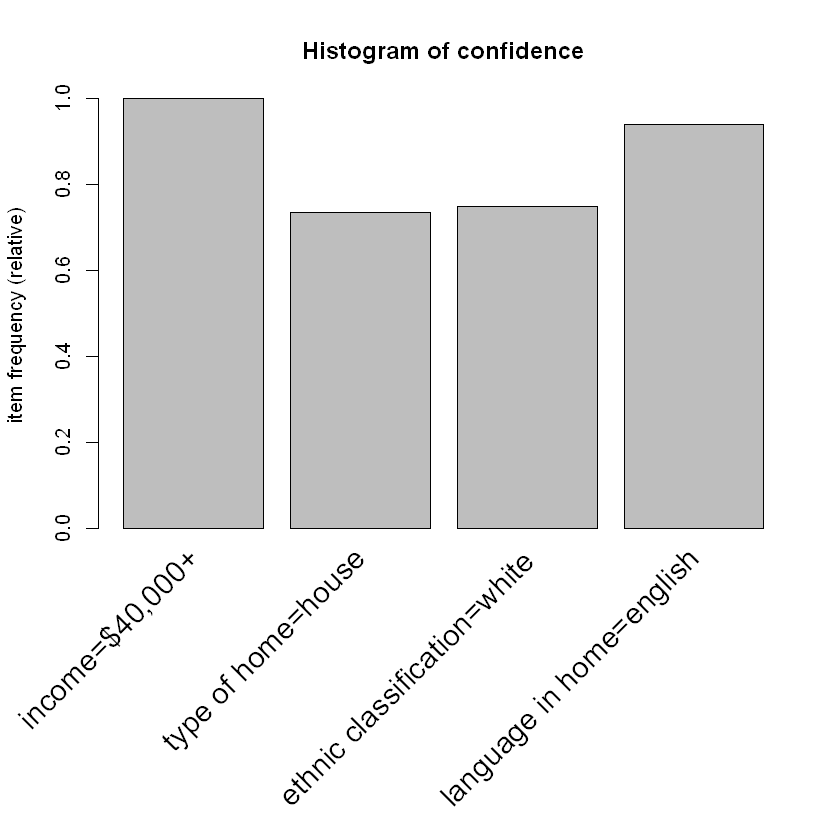

In [79]:
###  신뢰도가 0.7 이상인 item들의 빈도 막대그래프
itemFrequencyPlot(Income.high , support=0.7, cex.names = 1.5 , main = "Histogram of confidence")

- 최소신뢰도를 0.7로 설정
- 고소득자 그룹에 대해서 신뢰도가 0.7이상인 항목은 `income=$40,000+` , `type of home=house` , `ethnic classification=white` , `language in home=english` 뿐이다. 

`(d)` 연관규칙분석 : (rhs) 고소득자에 대한 연관규칙을 신뢰도 기준 상위 5개 추출하고 설명하여라. (단 최소지지도 0.1, 최소신뢰도 0.8, 향상도 1.0 적용)

In [73]:
### 지지도가 0.4 이상, 신뢰도 0.8이상인 연관규칙
rules = apriori(Income , parameter = list(support=0.1, conf =0.8))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 687 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[50 item(s), 6876 transaction(s)] done [0.01s].
sorting and recoding items ... [30 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 4 5 6 7 8 done [0.13s].
writing ... [8664 rule(s)] done [0.00s].
creating S4 object  ... done [0.01s].


In [75]:
### 지지도가 0.4 이상, 신뢰도 0.8이상, 향상도가 1.0 이상인 고소득자의 연관규칙
rules.sub <- subset(rules,  subset =  rhs %in% "income=$40,000+" &  lift > 1.0)

In [76]:
inspect(head(sort(rules.sub, by="confidence"),5)) ## 신뢰도 기준 상위 5개만 추출

    lhs                                      rhs                 support confidence  coverage     lift count
[1] {marital status=married,                                                                                
     occupation=professional/managerial,                                                                    
     householder status=own}              => {income=$40,000+} 0.1042757  0.8754579 0.1191099 2.318817   717
[2] {marital status=married,                                                                                
     occupation=professional/managerial,                                                                    
     type of home=house}                  => {income=$40,000+} 0.1038394  0.8409894 0.1234729 2.227520   714
[3] {marital status=married,                                                                                
     dual incomes=yes,                                                                                      
     householder st

- 기혼,전문/관리직,자가소유 이면 소득 수준이 4만달러 이상이다.
- 기혼,전문/관리직,주택거주 이면 소득 수준이 4만달러 이상이다.
- 기혼,맞벌이,자가소유,주택거주 이면 소득 수준이 4만달러 이상이다.
- 기혼,맞벌이,자가소유,가정에서 영어를 사용하면 소득 수준이 4만 달러 이상이다.
- 맞벌이,자가소유,주택거주,가정에서 영어를 사용하면 소득 수준이 4만 달러 이상이다.

----

### `2`. USArrests 데이터(R에 있음)에 대하여 계층적 군집분석을 실행하려고 한다. 다음 물음에 답하여라.

- 1973년 미국 50개 주에서 폭행,살인 및 강간으로 체포된 주민 100,000명당 통계가 포함되어있는 미국 주별 강력범죄율 데이터

In [82]:
str(USArrests)

'data.frame':	50 obs. of  4 variables:
 $ Murder  : num  13.2 10 8.1 8.8 9 7.9 3.3 5.9 15.4 17.4 ...
 $ Assault : int  236 263 294 190 276 204 110 238 335 211 ...
 $ UrbanPop: int  58 48 80 50 91 78 77 72 80 60 ...
 $ Rape    : num  21.2 44.5 31 19.5 40.6 38.7 11.1 15.8 31.9 25.8 ...


- 50개의 관측치(주)와 4개의 변수(살인 체포, 폭행 체포, 인구수, 강간 체포)가 있음.

In [85]:
head(USArrests) ## 데이터 확인

,Murder,Assault,UrbanPop,Rape
,<dbl>,<int>,<int>,<dbl>
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7


`(a)` Euclidean 거리를 사용하고, 최장연결법을 이용한 계층적 군집분석을 실행하고, dendrogram을 그려라.

In [91]:
D1 = dist(USArrests)  ## 유클리드 거리 사용
round(D1,2)

               Alabama Alaska Arizona Arkansas California Colorado Connecticut
Alaska           37.18                                                        
Arizona          63.01  46.59                                                 
Arkansas         46.93  77.20  108.85                                         
California       55.52  45.10   23.19    97.58                                
Colorado         41.93  66.48   90.35    36.73      73.20                     
Connecticut     128.21 159.41  185.16    85.03     169.28    98.08            
Delaware         16.81  45.18   58.62    53.01      49.29    41.48      128.21
Florida         102.00  79.97   41.65   148.74      60.98   131.41      226.30
Georgia          25.84  57.03   86.04    25.59      74.00    25.09      104.43
Hawaii          191.80 221.19  248.27   147.78     231.07   159.18       64.95
Idaho           116.76 146.48  176.82    70.59     162.61    90.89       25.28
Illinois         28.45  42.91   45.70    67.77      

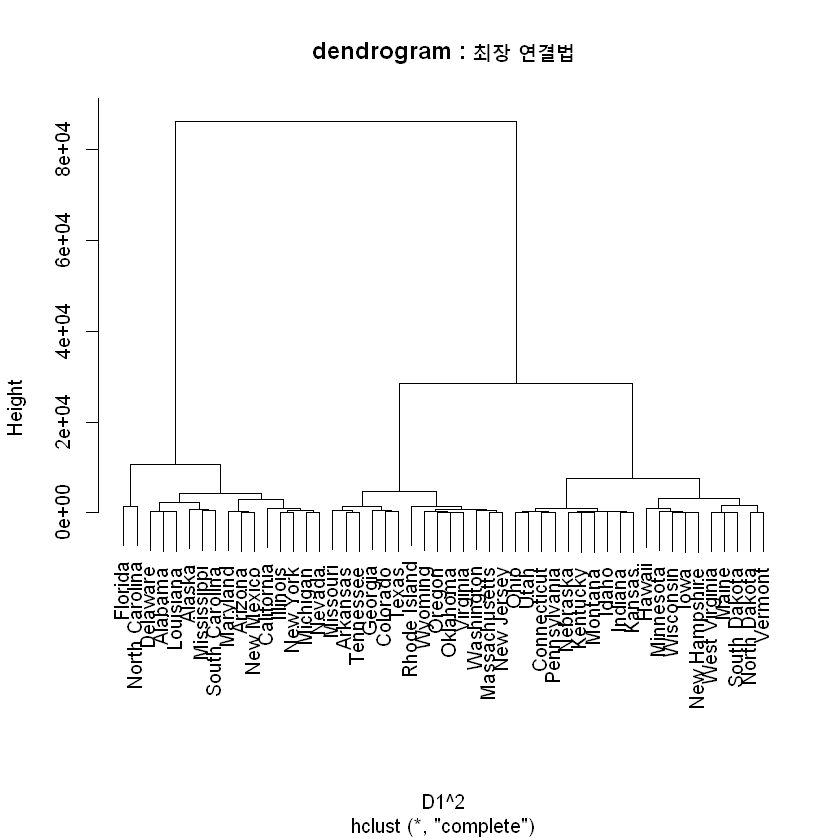

In [131]:
hc1 = hclust(D1^2 , method = "complete") ## 계층적 군집분석 , 최장 연결법
plot(hc1 , labels = rownames(USArrests)  , main = "dendrogram : 최장 연결법" )

`(b)` 위의 결과에서 3개의 군집으로 나누어라. 각 군집에는 어떤 주들이 포함되어 있는가? dendrogram에 3개의 군집으로 나누기 위해어떻게 나누었는지 표시하여라.

In [100]:
hc1.result = cutree(hc1 , k= 3) ## 3개의 군집으로 자름
hc1.result ## 군집 결과

Alabama         Alaska        Arizona       Arkansas     California 
             1              1              1              2              1 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              1              1              2 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              3              1              3              3 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              3              1 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             2              1              3              1              2 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             3              3              1              3              2 
    New Mexico       New York North Carolina   North Dakota           Ohio 
             1              1              1              3              3 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
             2              2              3              2              1 
  South Dakota      Tennessee          Texas           Utah        Vermont 
             3              2              2              3              3 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             2              2              3              3              2

In [117]:
rownames(USArrests)[hc1.result==1] ## 첫번째 군집에 포함된 주 

[1] "Alabama"        "Alaska"         "Arizona"        "California"    
 [5] "Delaware"       "Florida"        "Illinois"       "Louisiana"     
 [9] "Maryland"       "Michigan"       "Mississippi"    "Nevada"        
[13] "New Mexico"     "New York"       "North Carolina" "South Carolina"

In [118]:
rownames(USArrests)[hc1.result==2] ## 두번째 군집에 포함된 주 

[1] "Arkansas"      "Colorado"      "Georgia"       "Massachusetts"
 [5] "Missouri"      "New Jersey"    "Oklahoma"      "Oregon"       
 [9] "Rhode Island"  "Tennessee"     "Texas"         "Virginia"     
[13] "Washington"    "Wyoming"

In [119]:
rownames(USArrests)[hc1.result==3] ## 세번째 군집에 포함된 주 

[1] "Connecticut"   "Hawaii"        "Idaho"         "Indiana"      
 [5] "Iowa"          "Kansas"        "Kentucky"      "Maine"        
 [9] "Minnesota"     "Montana"       "Nebraska"      "New Hampshire"
[13] "North Dakota"  "Ohio"          "Pennsylvania"  "South Dakota" 
[17] "Utah"          "Vermont"       "West Virginia" "Wisconsin"

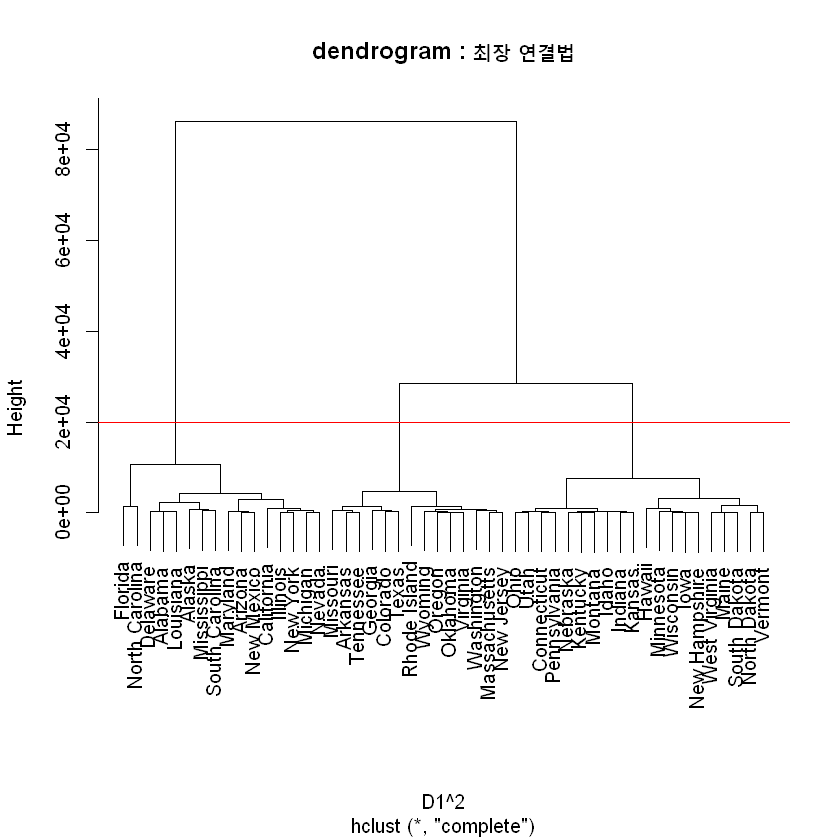

In [121]:
plot(hc1 , labels = rownames(USArrests)  , main = "dendrogram : 최장 연결법" )
abline(h=2e+04,col="red")

- 3개의 군집으로 나누기 위해 빨간 선으로 덴드로그램을 잘랐다.

`(c)` 각 변수를 평균이 0이고, 분산이 1이 되도록 표준화를 한 후 (a)의 군집분석을 실행하고,dendrogram을그려라.

In [126]:
sc_USA = scale(USArrests)
head(sc_USA)  ## 평균이 0 , 분산이1이 되도록 표준화 됨

,Murder,Assault,UrbanPop,Rape
Alabama,1.24256408,0.7828393,-0.5209066,-0.003416473
Alaska,0.50786248,1.1068225,-1.2117642,2.484202941
Arizona,0.07163341,1.4788032,0.9989801,1.042878388
Arkansas,0.23234938,0.2308680,-1.0735927,-0.184916602
California,0.27826823,1.2628144,1.7589234,2.067820292
Colorado,0.02571456,0.3988593,0.8608085,1.864967207


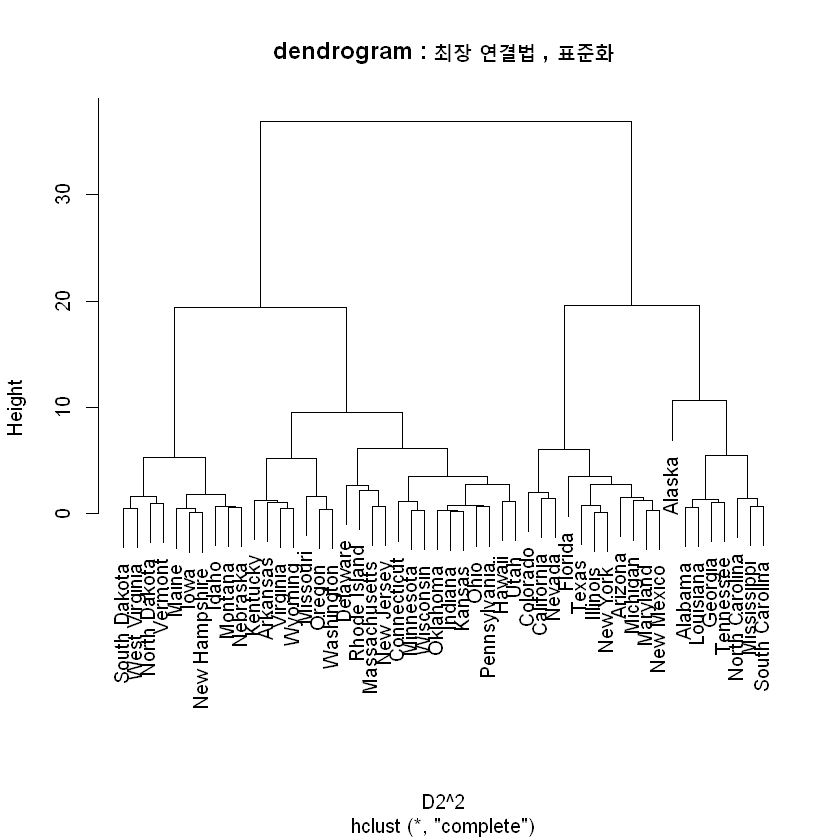

In [129]:
D2 = dist(sc_USA) ## 표준화, 유클리드 거리
hc2 = hclust(D2^2 , method = "complete") ## 표준화, 계층적 군집분석 , 최장 연결법
plot(hc2 , labels = rownames(USArrests)  , main = "dendrogram : 최장 연결법 , 표준화" )

`(d)` (a)와 (c)의 비교하여라. 결과가 다르다면 왜 다른 결과가 나왔는지 이유를 설명하여라.

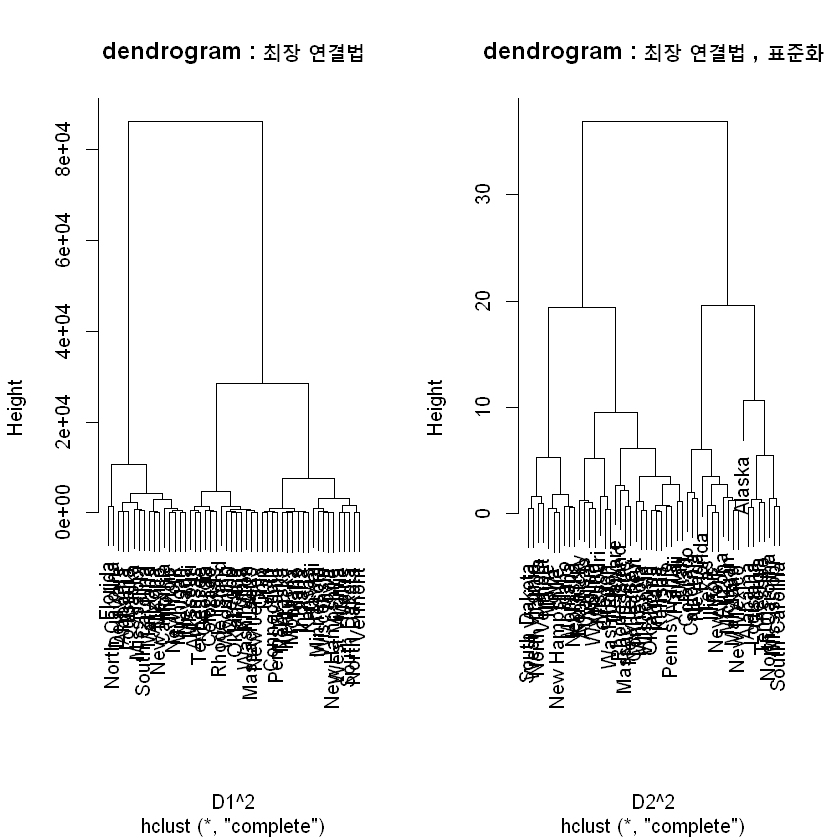

In [138]:
par(mfrow=c(1,2))
plot(hc1 , labels = rownames(USArrests)  , main = "dendrogram : 최장 연결법" )
plot(hc2 , labels = rownames(USArrests)  , main = "dendrogram : 최장 연결법 , 표준화" )

------

### `3`. ‘sample DT.csv’는 제품의 불량 여부(DEFECT TYPE)를 분류하기 위한 데이터이다. 각 변수들은 제품을 생성하는 공정에서 관측된 값들이다. 이를 분류하기 위한 모형 적합을 하여라.

In [178]:
DT = read.csv("sample_DT.csv",stringsAsFactors = T)
str(DT)

'data.frame':	10000 obs. of  21 variables:
 $ ValueG       : num  -13.1 -19.5 -52.7 -21.3 -25.9 ...
 $ DIFF_BRG     : int  -19 -19 -30 -71 -47 -24 102 -39 -27 -21 ...
 $ ValueR       : num  -13.16 -7.66 -51.52 -7.53 -25.53 ...
 $ DEFECT_RBG   : int  121 93 129 160 160 110 255 144 124 112 ...
 $ PKR.B        : num  2.77 2.25 1.84 2.51 2.28 ...
 $ MinG         : num  37.6 56.1 69.2 42.6 70.4 ...
 $ DEFECT_SIZE_Y: num  5.68 8.06 3.04 3.49 2.9 ...
 $ PKG.B        : num  -0.679 -0.314 0.117 0.41 0.423 ...
 $ MaxB         : num  46.9 147.3 175.5 84.9 69.6 ...
 $ BlackRatio   : num  1.5 1.79 1.84 2.11 2.14 ...
 $ ValueB       : num  -15 -27.6 -61.9 -9.8 -19 ...
 $ MeanG.B      : num  1.89 1.14 1.8 2.06 2.61 ...
 $ G            : num  37.9 67.9 128.5 67.2 84.6 ...
 $ PKB.R        : num  -0.335 1.423 1.001 -1.066 -0.632 ...
 $ DEFECT_LENGTH: num  6.77 11.68 4.04 9.92 4.2 ...
 $ PKR          : num  33.6 22.7 58.1 34.4 66.9 ...
 $ CBlobCnt     : num  0.186 5.2 2.858 0.609 -0.271 ...
 $ DEFECT_SIZ

- 10000개의 관측치와 21개의 변수
- 제품의 불량여부(DEFECT_TYPE)을 종속변수로 하는 분류 모형 적합

In [179]:
head(DT)  ## 데이터 확인

,ValueG,DIFF_BRG,ValueR,DEFECT_RBG,PKR.B,MinG,DEFECT_SIZE_Y,PKG.B,MaxB,BlackRatio,⋯,MeanG.B,G,PKB.R,DEFECT_LENGTH,PKR,CBlobCnt,DEFECT_SIZE_X,DEFECT_AREAR3,CTB,DEFECT_TYPE
,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,-13.14723,-19,-13.157690,121,2.770359,37.60900,5.678,-0.67921700,46.92277,1.498112,⋯,1.894088,37.88324,-0.3351126,6.772,33.61049,0.1863527,3.691,2.191,44.93980,G
2,-19.49653,-19,-7.656082,93,2.247860,56.05138,8.064,-0.31414030,147.30770,1.794743,⋯,1.136796,67.88417,1.4228510,11.675,22.67064,5.2002730,8.442,6.155,91.25580,G
3,-52.74004,-30,-51.522970,129,1.843374,69.15570,3.045,0.11667350,175.53920,1.835849,⋯,1.802764,128.51830,1.0009750,4.043,58.12484,2.8582440,2.660,2.299,142.37130,G
4,-21.28891,-71,-7.529115,160,2.505637,42.64801,3.492,0.40958330,84.89392,2.113454,⋯,2.058749,67.23537,-1.0662300,9.920,34.37201,0.6091162,9.285,3.502,53.74055,NG
5,-25.93095,-47,-25.531180,160,2.281065,70.44483,2.904,0.42329540,69.57097,2.135460,⋯,2.606597,84.59731,-0.6319174,4.203,66.94189,-0.2711601,3.038,2.578,62.75849,G
6,-11.02390,-24,-9.095288,110,2.543149,38.37995,5.020,-0.01648001,73.90049,1.560357,⋯,1.287369,53.37183,-0.1406898,6.894,42.45676,-0.1139603,4.725,2.671,68.76533,G


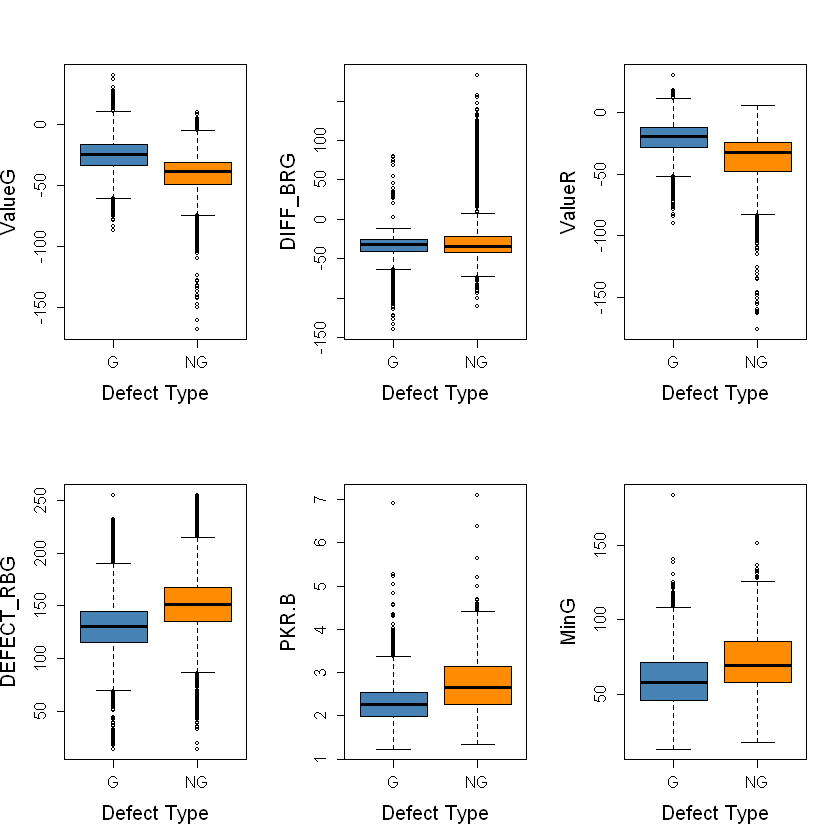

In [208]:
par(mfrow=c(2,3))
boxplot(DT[,1]~DEFECT_TYPE , data=DT , xlab='Defect Type',ylab='ValueG',cex.lab=1.5 
        , col =c("steelblue","darkorange"),cex.axis=1.3)
boxplot(DT[,2]~DEFECT_TYPE , data=DT , ylab='DIFF_BRG',xlab='Defect Type',cex.lab=1.5 
        , col =c("steelblue","darkorange"),cex.axis=1.3)
boxplot(DT[,3]~DEFECT_TYPE , data=DT , ylab='ValueR',xlab='Defect Type',cex.lab=1.5 
        , col =c("steelblue","darkorange"),cex.axis=1.3)
boxplot(DT[,4]~DEFECT_TYPE , data=DT , ylab='DEFECT_RBG',xlab='Defect Type',cex.lab=1.5 
        , col =c("steelblue","darkorange"),cex.axis=1.3)
boxplot(DT[,5]~DEFECT_TYPE , data=DT , ylab='PKR.B',xlab='Defect Type',cex.lab=1.5 
        , col =c("steelblue","darkorange"),cex.axis=1.3)
boxplot(DT[,6]~DEFECT_TYPE , data=DT , ylab='MinG',xlab='Defect Type',cex.lab=1.5 
        , col =c("steelblue","darkorange"),cex.axis=1.3)

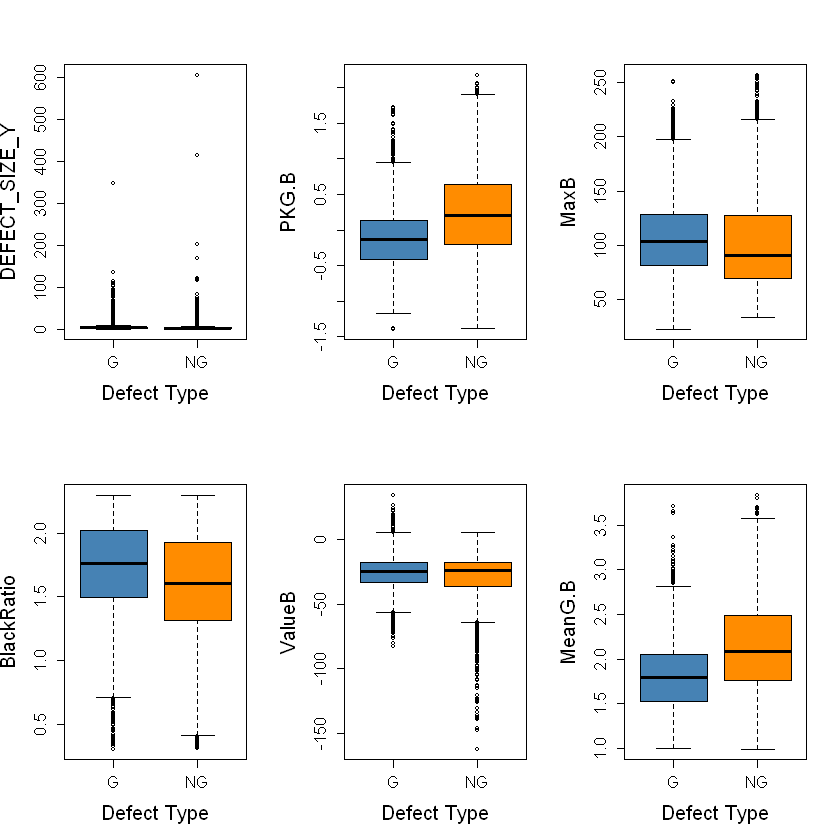

In [212]:
par(mfrow=c(2,3))
boxplot(DT[,7]~DEFECT_TYPE , data=DT , ylab=colnames(DT)[7],xlab='Defect Type',cex.lab=1.5 
        , col =c("steelblue","darkorange"),cex.axis=1.3)
boxplot(DT[,8]~DEFECT_TYPE , data=DT , ylab=colnames(DT)[8],xlab='Defect Type',cex.lab=1.5 
        , col =c("steelblue","darkorange"),cex.axis=1.3)
boxplot(DT[,9]~DEFECT_TYPE , data=DT , ylab=colnames(DT)[9],xlab='Defect Type',cex.lab=1.5 
        , col =c("steelblue","darkorange"),cex.axis=1.3)
boxplot(DT[,10]~DEFECT_TYPE , data=DT , ylab=colnames(DT)[10],xlab='Defect Type',cex.lab=1.5 
        , col =c("steelblue","darkorange"),cex.axis=1.3)
boxplot(DT[,11]~DEFECT_TYPE , data=DT , ylab=colnames(DT)[11],xlab='Defect Type',cex.lab=1.5 
        , col =c("steelblue","darkorange"),cex.axis=1.3)
boxplot(DT[,12]~DEFECT_TYPE , data=DT , ylab=colnames(DT)[12],xlab='Defect Type',cex.lab=1.5 
        , col =c("steelblue","darkorange"),cex.axis=1.3)

- DEFECT_SIZE_Y와 DEFECT Type의 상자그림을 보면 G와 NG의 상자의 길이, 위치, 이상치의 값들까지 비슷해서  DEFECT_SIZE_Y가 DEFECT Type에 영향을 끼치지 않을 것으로 예상된다.

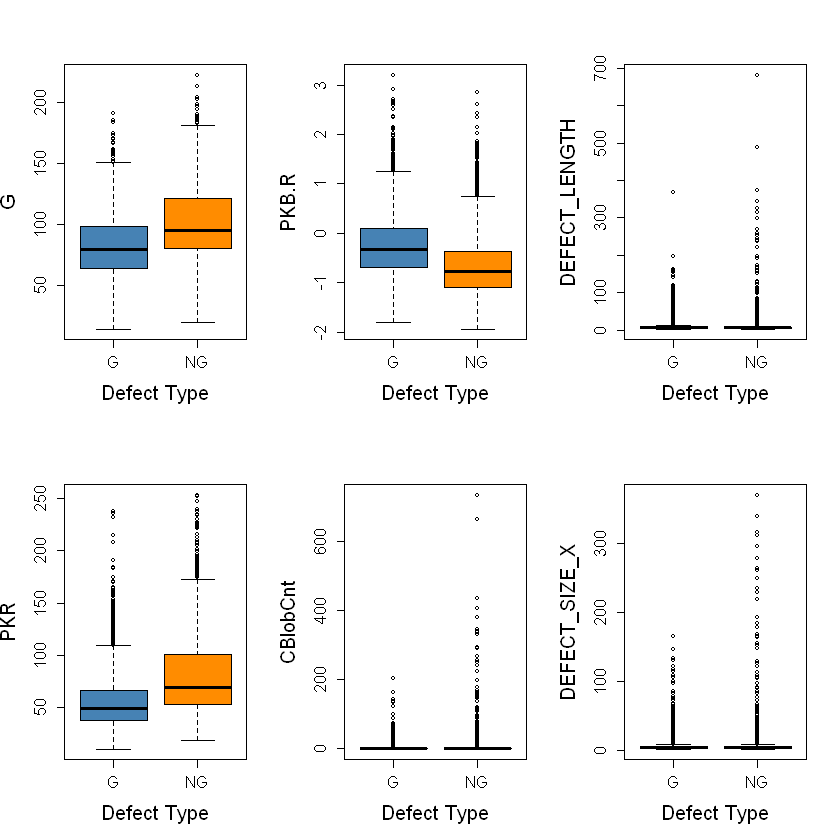

In [213]:
par(mfrow=c(2,3))
boxplot(DT[,13]~DEFECT_TYPE , data=DT , ylab=colnames(DT)[13],xlab='Defect Type',cex.lab=1.5 
        , col =c("steelblue","darkorange"),cex.axis=1.3)
boxplot(DT[,14]~DEFECT_TYPE , data=DT , ylab=colnames(DT)[14],xlab='Defect Type',cex.lab=1.5 
        , col =c("steelblue","darkorange"),cex.axis=1.3)
boxplot(DT[,15]~DEFECT_TYPE , data=DT , ylab=colnames(DT)[15],xlab='Defect Type',cex.lab=1.5 
        , col =c("steelblue","darkorange"),cex.axis=1.3)
boxplot(DT[,16]~DEFECT_TYPE , data=DT , ylab=colnames(DT)[16],xlab='Defect Type',cex.lab=1.5 
        , col =c("steelblue","darkorange"),cex.axis=1.3)
boxplot(DT[,17]~DEFECT_TYPE , data=DT , ylab=colnames(DT)[17],xlab='Defect Type',cex.lab=1.5 
        , col =c("steelblue","darkorange"),cex.axis=1.3)
boxplot(DT[,18]~DEFECT_TYPE , data=DT , ylab=colnames(DT)[18],xlab='Defect Type',cex.lab=1.5 
        , col =c("steelblue","darkorange"),cex.axis=1.3)

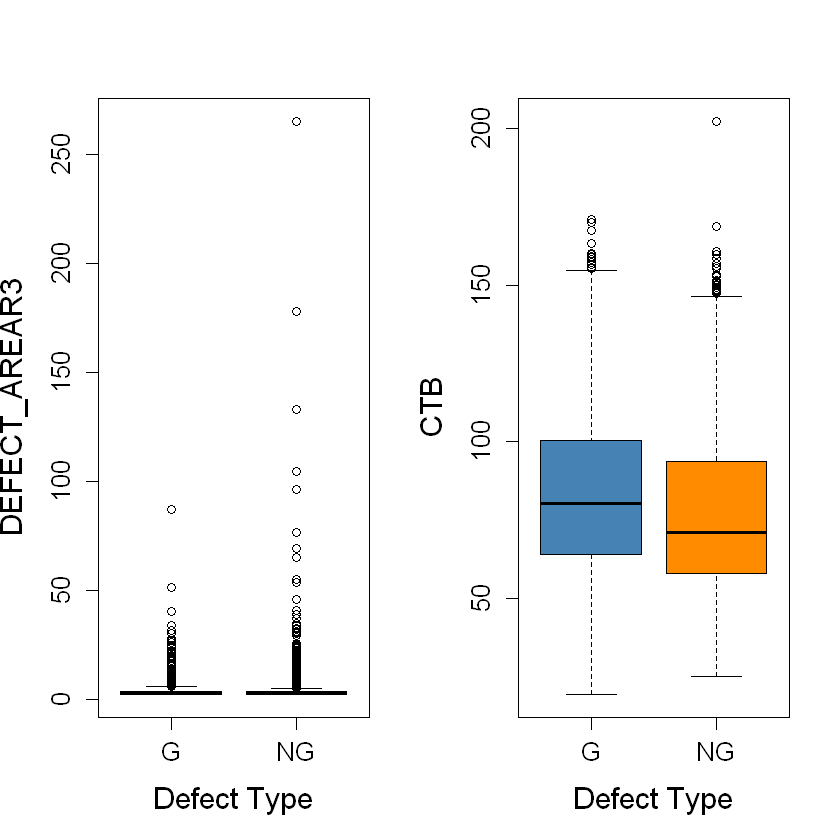

In [214]:
par(mfrow=c(1,2))
boxplot(DT[,19]~DEFECT_TYPE , data=DT , ylab=colnames(DT)[19],xlab='Defect Type',cex.lab=1.5 
        , col =c("steelblue","darkorange"),cex.axis=1.3)
boxplot(DT[,20]~DEFECT_TYPE , data=DT , ylab=colnames(DT)[20],xlab='Defect Type',cex.lab=1.5 
        , col =c("steelblue","darkorange"),cex.axis=1.3)

`(a)` 모형 검증을 위해 training data 와 testing data로 나누시오. (단, training data : testing data = 7:3, seed=1234)

In [180]:
set.seed(1234)
train_id = sample(1:nrow(DT) , nrow(DT)*0.7)
train = DT[train_id,]  ## training data
test = DT[-train_id,]  ## testing data

`(b)` 로지스틱회귀모형

In [221]:
glm_model = glm(DEFECT_TYPE~., data=train , family=binomial) ## training data로 로지스틱 회귀모형 적합

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


In [218]:
summary(glm_model)


Call:
glm(formula = DEFECT_TYPE ~ ., family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.1818  -0.6786  -0.3105   0.5880   3.2671  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -3.758997   0.395664  -9.500  < 2e-16 ***
ValueG        -0.199460   0.010989 -18.150  < 2e-16 ***
DIFF_BRG       0.025397   0.002007  12.655  < 2e-16 ***
ValueR        -0.043768   0.005945  -7.362 1.81e-13 ***
DEFECT_RBG     0.010078   0.001386   7.274 3.49e-13 ***
PKR.B          0.590722   0.098758   5.981 2.21e-09 ***
MinG           0.012068   0.003896   3.098 0.001949 ** 
DEFECT_SIZE_Y -0.018684   0.029730  -0.628 0.529696    
PKG.B          0.302182   0.090768   3.329 0.000871 ***
MaxB          -0.009797   0.002646  -3.703 0.000213 ***
BlackRatio    -0.254148   0.091947  -2.764 0.005709 ** 
ValueB         0.137857   0.009382  14.694  < 2e-16 ***
MeanG.B        0.461512   0.107916   4.277 1.90e-05 ***
G             -0

In [222]:
glm_model2 = step(glm_model)

Start:  AIC=5986.89
DEFECT_TYPE ~ ValueG + DIFF_BRG + ValueR + DEFECT_RBG + PKR.B + 
    MinG + DEFECT_SIZE_Y + PKG.B + MaxB + BlackRatio + ValueB + 
    MeanG.B + G + PKB.R + DEFECT_LENGTH + PKR + CBlobCnt + DEFECT_SIZE_X + 
    DEFECT_AREAR3 + CTB



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                Df Deviance    AIC
- DEFECT_LENGTH  1   5945.2 5985.2
- DEFECT_SIZE_X  1   5945.3 5985.3
- DEFECT_SIZE_Y  1   5945.3 5985.3
<none>               5944.9 5986.9
- PKR            1   5949.3 5989.3
- PKB.R          1   5952.2 5992.2
- BlackRatio     1   5952.5 5992.5
- MinG           1   5954.5 5994.5
- PKG.B          1   5956.0 5996.0
- MaxB           1   5958.6 5998.6
- CBlobCnt       1   5961.4 6001.4
- MeanG.B        1   5963.3 6003.3
- PKR.B          1   5981.0 6021.0
- DEFECT_AREAR3  1   5995.8 6035.8
- DEFECT_RBG     1   5998.9 6038.9
- ValueR         1   6001.4 6041.4
- CTB            1   6003.4 6043.4
- G              1   6096.5 6136.5
- DIFF_BRG       1   6135.3 6175.3
- ValueB         1   6182.7 6222.7
- ValueG         1   6333.6 6373.6


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=5985.23
DEFECT_TYPE ~ ValueG + DIFF_BRG + ValueR + DEFECT_RBG + PKR.B + 
    MinG + DEFECT_SIZE_Y + PKG.B + MaxB + BlackRatio + ValueB + 
    MeanG.B + G + PKB.R + PKR + CBlobCnt + DEFECT_SIZE_X + DEFECT_AREAR3 + 
    CTB



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                Df Deviance    AIC
- DEFECT_SIZE_X  1   5945.3 5983.3
<none>               5945.2 5985.2
- PKR            1   5949.5 5987.5
- PKB.R          1   5952.6 5990.6
- BlackRatio     1   5952.8 5990.8
- MinG           1   5954.9 5992.9
- PKG.B          1   5956.3 5994.3
- MaxB           1   5958.9 5996.9
- CBlobCnt       1   5961.8 5999.8
- MeanG.B        1   5963.8 6001.8
- DEFECT_SIZE_Y  1   5972.0 6010.0
- PKR.B          1   5981.1 6019.1
- DEFECT_RBG     1   5998.9 6036.9
- DEFECT_AREAR3  1   5999.6 6037.6
- ValueR         1   6001.5 6039.5
- CTB            1   6003.7 6041.7
- G              1   6097.0 6135.0
- DIFF_BRG       1   6135.4 6173.4
- ValueB         1   6183.3 6221.3
- ValueG         1   6333.8 6371.8


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=5983.28
DEFECT_TYPE ~ ValueG + DIFF_BRG + ValueR + DEFECT_RBG + PKR.B + 
    MinG + DEFECT_SIZE_Y + PKG.B + MaxB + BlackRatio + ValueB + 
    MeanG.B + G + PKB.R + PKR + CBlobCnt + DEFECT_AREAR3 + CTB



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                Df Deviance    AIC
<none>               5945.3 5983.3
- PKR            1   5949.6 5985.6
- PKB.R          1   5952.6 5988.6
- BlackRatio     1   5952.9 5988.9
- MinG           1   5955.1 5991.1
- PKG.B          1   5956.4 5992.4
- MaxB           1   5958.9 5994.9
- CBlobCnt       1   5962.6 5998.6
- MeanG.B        1   5963.8 5999.8
- DEFECT_SIZE_Y  1   5976.8 6012.8
- PKR.B          1   5981.2 6017.2
- DEFECT_RBG     1   5999.1 6035.1
- ValueR         1   6001.5 6037.5
- CTB            1   6003.7 6039.7
- DEFECT_AREAR3  1   6006.6 6042.6
- G              1   6097.2 6133.2
- DIFF_BRG       1   6135.5 6171.5
- ValueB         1   6183.4 6219.4
- ValueG         1   6334.0 6370.0


In [223]:
summary(glm_model2)


Call:
glm(formula = DEFECT_TYPE ~ ValueG + DIFF_BRG + ValueR + DEFECT_RBG + 
    PKR.B + MinG + DEFECT_SIZE_Y + PKG.B + MaxB + BlackRatio + 
    ValueB + MeanG.B + G + PKB.R + PKR + CBlobCnt + DEFECT_AREAR3 + 
    CTB, family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.2194  -0.6792  -0.3105   0.5885   3.2653  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -3.754167   0.395592  -9.490  < 2e-16 ***
ValueG        -0.199429   0.010987 -18.151  < 2e-16 ***
DIFF_BRG       0.025330   0.002001  12.655  < 2e-16 ***
ValueR        -0.043663   0.005941  -7.350 1.99e-13 ***
DEFECT_RBG     0.010048   0.001384   7.259 3.90e-13 ***
PKR.B          0.588591   0.098689   5.964 2.46e-09 ***
MinG           0.012146   0.003894   3.119 0.001815 ** 
DEFECT_SIZE_Y -0.035036   0.005393  -6.497 8.19e-11 ***
PKG.B          0.302046   0.090767   3.328 0.000876 ***
MaxB          -0.009736   0.002639  -3.690 0.000225 ***
Bl

In [226]:
contrasts(train$DEFECT_TYPE)

,NG
G,0
NG,1


In [237]:
fitted_class = ifelse(predict(glm_model2,newdata=test,type='response') > 0.5, 'NG' , 'G')

In [238]:
addmargins(table(test$DEFECT_TYPE,fitted_class))

,G,NG,Sum
G,1578,196,1774
NG,355,871,1226
Sum,1933,1067,3000


- 실제값/예측값
- 정상인 실제 제품 1774개 중 1578개를 정상이라고 예측
- 불량인 실제 제품 1226개 중 871개를 불량이라고 예측
- 행렬의 대각선 : "정분류 되었다" 

In [281]:
mean(fitted_class==test$DEFECT_TYPE)   ## testing data 정분류율

[1] 0.8163333

In [280]:
mean(fitted_class!=test$DEFECT_TYPE)  ## testing data 오분류율

[1] 0.1836667

- training data와 testing data의 정분류율이 비슷하게 나온다.

`(c)` 의사결정나무(가지치기 실행)

In [241]:
library(rpart)  ## Recursive Partitioning and Regression Trees
library(rpart.plot)  ## 그림용

In [345]:
tree_model = rpart(DEFECT_TYPE ~., data = train ,
                 control = rpart.control(cp=0.0015 , minsplit=1))
tree_model

n= 7000 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

   1) root 7000 2831 G (0.59557143 0.40442857)  
     2) ValueG>=-26.73187 2615  324 G (0.87609943 0.12390057)  
       4) DIFF_BRG< -7 2575  285 G (0.88932039 0.11067961)  
         8) ValueG>=-23.20983 1989  151 G (0.92408245 0.07591755)  
          16) DEFECT_AREAR3< 6.9925 1852  110 G (0.94060475 0.05939525)  
            32) DEFECT_SIZE_Y>=2.367 1843  102 G (0.94465545 0.05534455) *
            33) DEFECT_SIZE_Y< 2.367 9    1 NG (0.11111111 0.88888889) *
          17) DEFECT_AREAR3>=6.9925 137   41 G (0.70072993 0.29927007)  
            34) ValueR>=-12.17876 102   18 G (0.82352941 0.17647059) *
            35) ValueR< -12.17876 35   12 NG (0.34285714 0.65714286)  
              70) ValueG< -19.86283 12    3 G (0.75000000 0.25000000) *
              71) ValueG>=-19.86283 23    3 NG (0.13043478 0.86956522) *
         9) ValueG< -23.20983 586  134 G (0.77133106 0.22866894)  
          18) MaxB>=73.82685 46

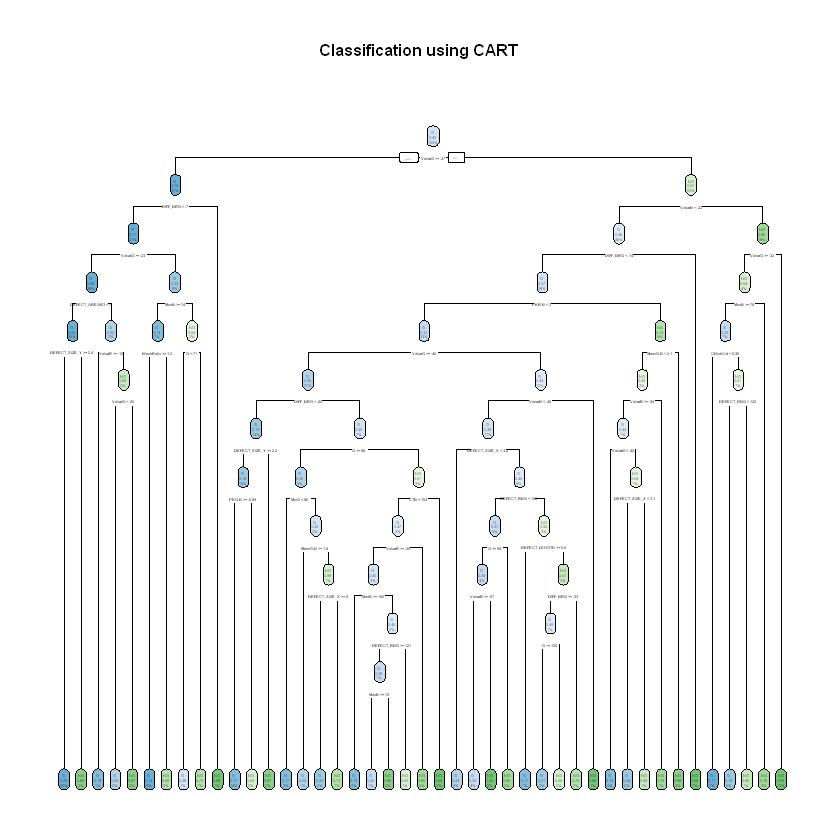

In [267]:
rpart.plot(tree_model, main = "Classification using CART")

- 터미널 노드의 개수 :43개

In [268]:
tree_model$variable.importance   ## Gini 지수를 얼마나 줄였는지 변수 중요도

ValueG        ValueR             G        ValueB      DIFF_BRG 
    822.35682     561.29006     467.28196     427.01727     373.64930 
          PKR          MinG    DEFECT_RBG          MaxB           CTB 
    353.23663     342.47180     285.95765     259.59740     193.46171 
        PKR.B       MeanG.B         PKG.B    BlackRatio DEFECT_SIZE_Y 
    173.78387     162.02460     131.64109      87.44062      53.38933 
DEFECT_LENGTH DEFECT_SIZE_X         PKB.R      CBlobCnt DEFECT_AREAR3 
     53.06484      52.54135      34.23086      31.50761      20.62444

In [269]:
tree_model$cptable  ## complexity parameter

,CP,nsplit,rel error,xerror,xstd
1,0.222182974,0,1.0000000,1.0000000,0.01450431
2,0.119922289,1,0.7778170,0.7767573,0.01371796
3,0.057223596,3,0.5379724,0.5475097,0.01227087
4,0.013422819,4,0.4807489,0.4969975,0.01184351
5,0.012892971,5,0.4673260,0.4800424,0.01168958
6,0.006711409,7,0.4415401,0.4613211,0.01151308
7,0.005828329,10,0.4214059,0.4475450,0.01137864
8,0.004238785,12,0.4097492,0.4478983,0.01138214
9,0.003179089,13,0.4055104,0.4373013,0.01127608
10,0.002354880,20,0.3832568,0.4284705,0.01118583


- 오분류율 xerror가 0.4221123이 가장 작음
- xerror + xstd = 0.4221123 + 0.01111978 = 0.43323208
- 0.001766160 ~ 0.003179089 값 중 아무거나 cp 값으로 정해주면 된다. --> cp = 0.003

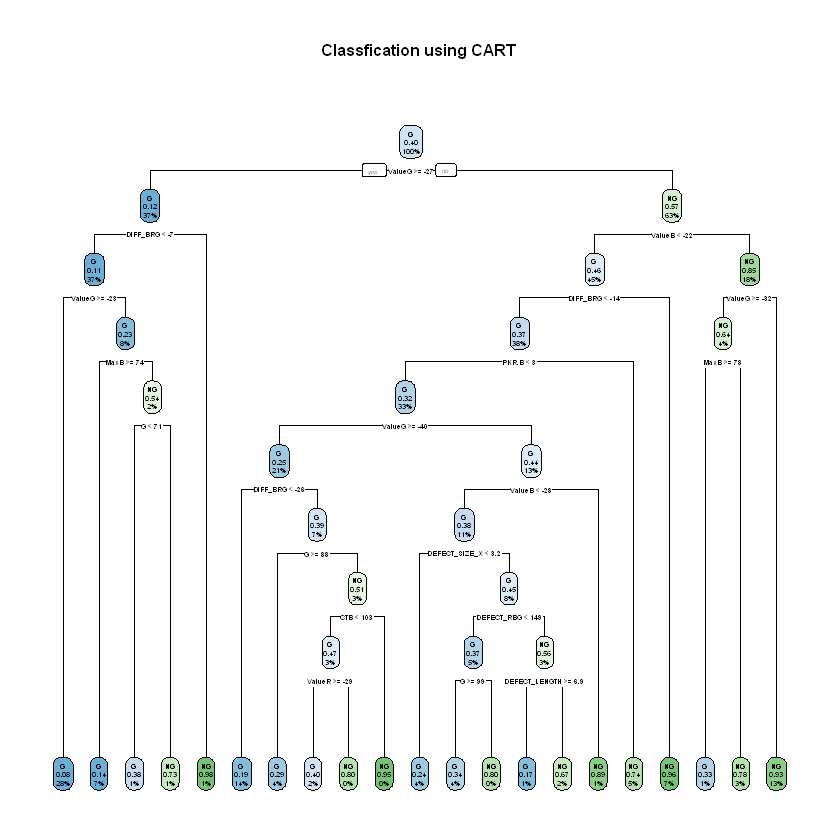

In [273]:
prune_tree_model = rpart(DEFECT_TYPE~. ,data = train, 
                       control = rpart.control(cp=0.003))

rpart.plot(prune_tree_model, main = "Classfication using CART")

- 터미널 노드의 개수 : 21개

In [274]:
yhat = predict(prune_tree_model , newdata = test , type='class')
yhat

1    2    4    7    8   13   19   21   25   29   32   37   39   45   46   50 
   G    G    G   NG   NG    G   NG   NG   NG    G   NG    G    G    G    G    G 
  53   54   55   60   70   71   82   83   85   88   89   90   92   93   97   98 
  NG    G    G   NG    G   NG    G    G    G    G   NG    G   NG    G    G    G 
 100  101  104  105  108  112  114  115  125  127  128  130  134  135  139  142 
  NG    G    G    G   NG    G    G    G   NG   NG    G    G   NG    G   NG   NG 
 149  151  155  160  162  165  169  171  177  184  188  196  197  203  209  212 
   G   NG   NG    G    G    G    G   NG   NG    G   NG   NG   NG   NG    G   NG 
 213  222  223  227  232  239  241  249  255  259  261  271  273  274  275  276 
   G   NG   NG    G    G   NG   NG    G    G    G    G   NG   NG    G    G   NG 
 283  285  286  287  288  293  299  303  307  308  311  317  320  322  324  325 
   G   NG    G    G   NG   NG   NG    G    G    G    G    G    G    G    G    G 
 326  328  330  335  337  338  341  342  346  349  351  354  358  359  362  363 
  NG   NG    G   NG   NG    G    G    G   NG   NG    G   NG   NG   NG    G   NG 
 364  375  376  380  382  384  386  388  390  391  401  402  406  408  409  411 
   G    G    G   NG   NG    G   NG    G    G   NG    G   NG    G    G    G    G 
 416  421  423  435  436  438  440  448  451  455  459  462  465  466  468  475 
   G   NG   NG    G   NG   NG   NG    G    G    G    G    G   NG    G    G   NG 
 477  481  483  484  487  492  495  496  499  503  504  505  516  527  532  533 
   G    G   NG    G    G    G    G   NG    G    G    G    G    G    G    G    G 
 536  537  538  545  547  552  554  556  558  559  562  565  569  571  573  579 
  NG   NG   NG   NG    G    G   NG   NG    G    G    G    G    G    G    G    G 
 581  589  593  595  596  597  605  607  615  617  619  622  635  636  638  641 
  NG   NG    G    G   NG   NG    G    G    G    G    G    G   NG   NG    G    G 
 643  646  648  649  651  653  655  657  659  660  663  666  667  669  670  675 
   G    G    G   NG   NG   NG   NG   NG   NG   NG    G    G   NG    G    G    G 
 677  692  696  707  708  711  712  718  720  724  728  729  730  735  737  738 
  NG    G   NG    G   NG    G   NG    G    G   NG    G   NG   NG    G    G   NG 
 739  741  742  743  744  745  747  748  749  757  759  764  765  766  768  779 
   G    G    G    G    G    G   NG   NG    G   NG   NG   NG    G   NG    G   NG 
 781  784  795  803  804  809  818  821  823  825  826  828  830  831  832  833 
   G    G   NG   NG    G    G    G    G    G    G   NG    G   NG   NG    G   NG 
 836  843  847  851  858  864  867  874  877  888  889  892  897  904  905  912 
   G    G    G    G    G   NG   NG    G   NG   NG    G    G    G    G    G    G 
 913  914  916  919  922  923  924  929  931  932  938  942  944  952  954  955 
   G    G    G    G   NG    G    G   NG    G    G   NG    G    G    G    G    G 
 956  958  963  964  969  972  973  974  977  978  980  982  985  986  987  988 
  NG    G    G    G    G    G    G    G   NG   NG   NG   NG   NG    G    G    G 
 992  993 1000 1005 1019 1021 1024 1051 1052 1053 1055 1057 1058 1061 1063 1066 
   G    G    G    G   NG    G    G    G   NG   NG   NG    G   NG    G    G    G 
1070 1079 1080 1081 1091 1093 1095 1096 1098 1101 1109 1112 1115 1118 1119 1120 
   G    G    G    G    G    G    G    G    G    G    G    G    G    G   NG    G 
1121 1122 1127 1136 1137 1142 1151 1153 1155 1156 1158 1160 1162 1163 1164 1168 
   G   NG    G    G    G   NG    G    G    G    G   NG    G    G    G   NG   NG 
1173 1174 1181 1182 1189 1193 1201 1202 1203 1204 1210 1212 1213 1214 1223 1224 
  NG    G    G    G   NG   NG    G    G    G    G    G    G    G    G   NG    G 
1228 1230 1236 1238 1240 1244 1246 1247 1249 1250 1252 1253 1257 1259 1261 1262 
   G    G   NG    G    G   NG   NG    G   NG   NG    G   NG    G   NG   NG   NG 
1267 1271 1273 1280 1281 1283 1291 1292 1295 1297 1313 1316 1342 1349 1350 1354 
   G    G    G    G    G    G    G

In [275]:
table(yhat , test$DEFECT_TYPE)

    
yhat    G   NG
  G  1618  353
  NG  156  873

In [278]:
mean(yhat==test$DEFECT_TYPE) ## 정분류율

[1] 0.8303333

In [277]:
mean(yhat!= test$DEFECT_TYPE)  ## 오분류율

[1] 0.1696667

`(d)` 배깅

In [282]:
library(ipred) ##bagging

In [284]:
bagg_model = ipredbagg(train$DEFECT_TYPE , train[,-grep('DEFECT_TYPE' , names(train))] 
                    , nbagg=100 , coob= T)
# y ,x , tree개수 100개 , OOB 넣어줌.

In [286]:
bagg_model


Bagging classification trees with 100 bootstrap replications 
Out-of-bag estimate of misclassification error:  0.1506 


- OOB error가 약 15%이다.

In [290]:
yhat = predict(bagg_model , newdata =test)

In [291]:
table(test$DEFECT_TYPE , yhat)

    yhat
        G   NG
  G  1647  127
  NG  285  941

In [294]:
mean(yhat==test$DEFECT_TYPE)  ## 정분류율

[1] 0.8626667

In [295]:
mean(yhat!=test$DEFECT_TYPE)  ## 오분류율

[1] 0.1373333

`(e)` 부스팅

In [296]:
library(gbm) ## Boosting
library(xgboost)  ## xgboost  
library(adabag)  ##Adaboosting : boosting

Loaded gbm 2.1.8

Loading required package: caret

Loading required package: lattice

Loading required package: foreach

Loading required package: doParallel

Loading required package: iterators

Loading required package: parallel


Attaching package: 'adabag'


The following object is masked from 'package:ipred':

    bagging




In [300]:
train2 = train
train2$DEFECT_TYPE = ifelse(train$DEFECT_TYPE == 'NG' , 1, 0)

In [301]:
head(train2)

,ValueG,DIFF_BRG,ValueR,DEFECT_RBG,PKR.B,MinG,DEFECT_SIZE_Y,PKG.B,MaxB,BlackRatio,⋯,MeanG.B,G,PKB.R,DEFECT_LENGTH,PKR,CBlobCnt,DEFECT_SIZE_X,DEFECT_AREAR3,CTB,DEFECT_TYPE
,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7452,-24.10795,-24,-25.886340,132,2.802970,54.46418,3.369,-0.2302733,64.13734,1.831493,⋯,2.435833,77.97177,-0.7043600,5.839,64.99260,0.27468140,4.769,2.525,58.09691,1
8016,-49.96589,64,-26.652010,255,2.546800,51.41413,11.243,1.0238360,80.26688,1.265122,⋯,2.347748,97.02312,-1.1412240,21.088,61.76728,9.54756200,17.842,8.608,63.98524,1
7162,-25.08202,-63,-25.761190,138,2.390391,69.67043,2.967,-0.1281765,65.34564,1.771518,⋯,2.352913,83.65391,-0.8104326,4.267,59.28858,0.06004302,3.067,2.700,59.83122,1
8086,-29.94522,-33,-22.998760,161,2.269450,61.15324,7.474,-0.6524562,127.25700,1.794601,⋯,1.845382,81.51328,1.9710240,9.302,27.46879,0.29336500,5.538,4.103,102.48820,0
7269,-23.98308,-22,-8.394189,96,1.732167,64.62559,4.402,-0.3505015,94.87272,2.199078,⋯,1.113058,71.31674,1.9760950,7.587,22.65789,0.36340570,6.179,2.363,88.92911,0
9196,-25.21274,-33,-24.608900,118,2.981899,64.69372,5.370,0.5482666,69.44233,2.224410,⋯,1.732993,71.35877,-0.4236869,7.680,57.68363,-0.54482670,5.490,4.327,60.96888,0


- 종속변수의 값이 0/1로 변경되었다.

In [361]:
boosting_model = gbm(DEFECT_TYPE~. , data = train2 , 
                    distribution = 'bernoulli' , 
                    interaction.depth =4 ,
                    n.trees = 500)

In [362]:
boosting_model

gbm(formula = DEFECT_TYPE ~ ., distribution = "bernoulli", data = train2, 
    n.trees = 500, interaction.depth = 4)
A gradient boosted model with bernoulli loss function.
500 iterations were performed.
There were 20 predictors of which 20 had non-zero influence.

,var,rel.inf
,<chr>,<dbl>
ValueG,ValueG,24.859712
DIFF_BRG,DIFF_BRG,12.887114
ValueB,ValueB,9.515833
PKR.B,PKR.B,6.237734
MaxB,MaxB,5.091172
DEFECT_RBG,DEFECT_RBG,4.131940
ValueR,ValueR,3.863208
BlackRatio,BlackRatio,3.546764
DEFECT_SIZE_Y,DEFECT_SIZE_Y,3.317576


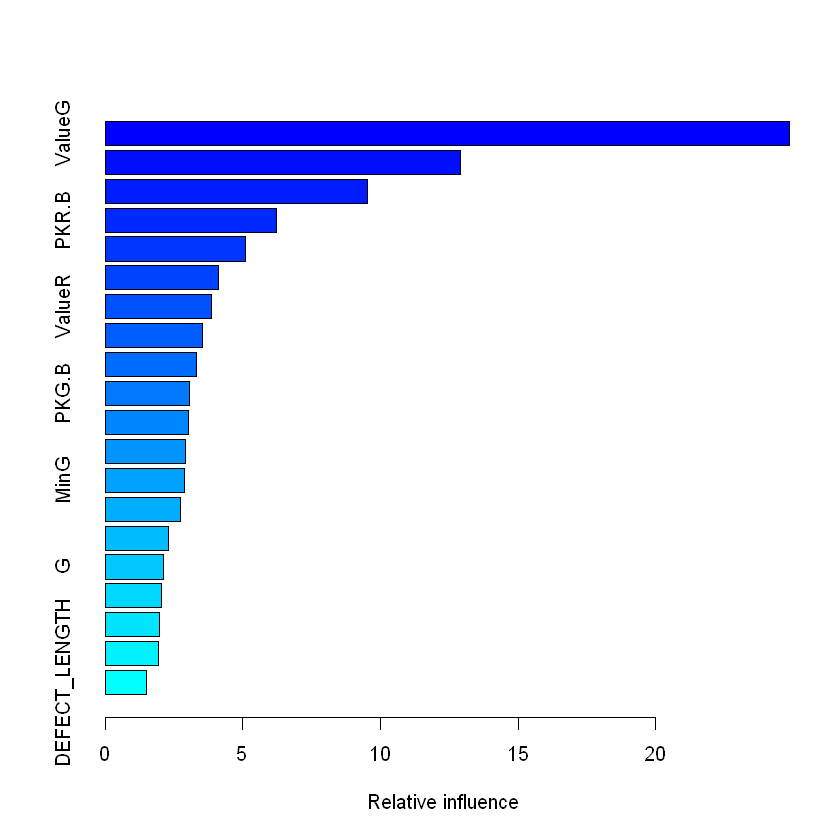

In [363]:
summary(boosting_model)

- 변수중요도 확인 가능

In [364]:
boost_prob = predict(boosting_model , newdata= test , 
                         n.trees=500,
                         type = 'response')

In [365]:
yhat.boost = ifelse(boost_prob > 0.5 , 'NG' , 'G')

In [366]:
table(test$DEFECT_TYPE , yhat.boost)

    yhat.boost
        G   NG
  G  1619  155
  NG  266  960

In [367]:
mean(yhat.boost== test$DEFECT_TYPE)  ## 정분류율

[1] 0.8596667

In [368]:
mean(yhat.boost!= test$DEFECT_TYPE) ## 오분류율

[1] 0.1403333

In [369]:
boosting2 = gbm(DEFECT_TYPE ~. , data = train2, 
                    distribution = 'bernoulli' , 
                    interaction.depth =4 ,
                     cv.fold=10,
                    n.trees =500 )

[1] 354

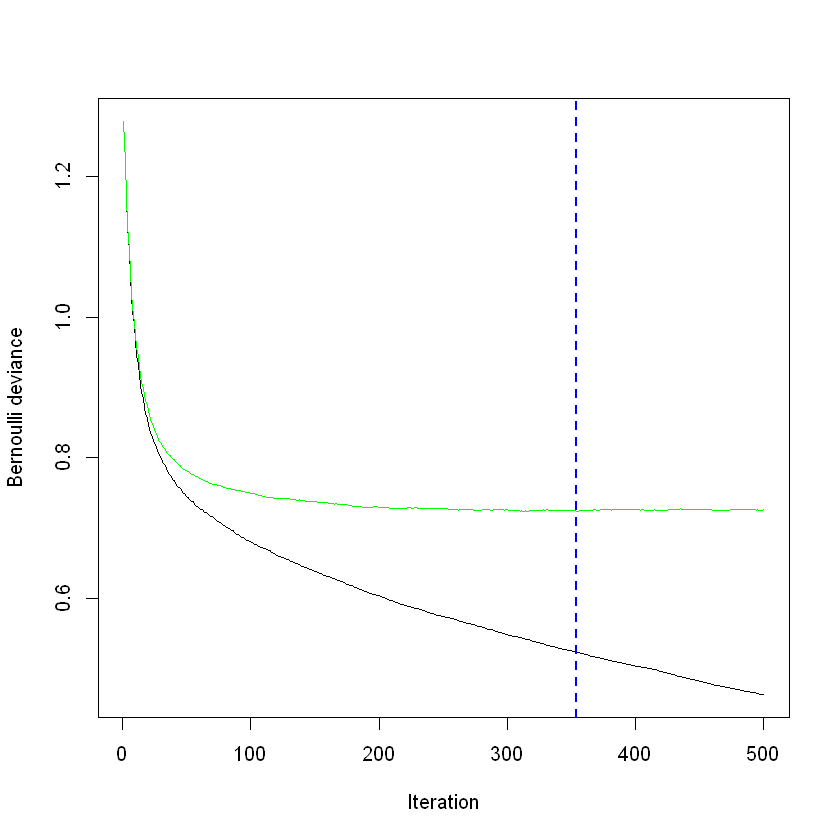

In [370]:
gbm.perf(boosting2 , plot.it =TRUE ,  overlay = TRUE , method='cv')

- 316개가 좋겠다.
- train_error는 점점 낮아지만
- validation_error는 더이상 작아지지 않음 -> 과적합 위험 -> 가장 작은 지점에서 끊어줌

In [309]:
boosting2 = gbm(DEFECT_TYPE ~. , data =train2, 
                    distribution = 'bernoulli' , 
                    interaction.depth =4 ,
                     cv.fold=10,
                    n.trees =316 )

In [311]:
boosting2

gbm(formula = DEFECT_TYPE ~ ., distribution = "bernoulli", data = train2, 
    n.trees = 316, interaction.depth = 4, cv.folds = 10)
A gradient boosted model with bernoulli loss function.
316 iterations were performed.
The best cross-validation iteration was 311.
There were 20 predictors of which 20 had non-zero influence.

In [320]:
boosting2_prob = predict(boosting2 , newdata= test , 
                         n.trees=316,
                         type = 'response')

In [322]:
yhat.boosting2 = ifelse(boosting2_prob > 0.5 , 'NG' , 'G')

In [323]:
table(test$DEFECT_TYPE , yhat.boosting2)

    yhat.boosting2
        G   NG
  G  1645  129
  NG  271  955

In [324]:
mean(yhat.boosting2== test$DEFECT_TYPE)  ## 정분류율

[1] 0.8666667

In [325]:
mean(yhat.boosting2!= test$DEFECT_TYPE) ## 오분류율

[1] 0.1333333

- 정분류율이 커지고, 오분류율이 작아졌다.
- 가지수가 감소하고 정분류율이 커지고 오분류율이 작아졌으나 그 변화가 미미하다. 

`(f)` 랜덤포레스트

In [330]:
library(randomForest) ##random Forest

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:ggplot2':

    margin




In [333]:
rf_model = randomForest(DEFECT_TYPE ~. , data = train , mtry =4 , importance =TRUE, 
                       xtest = test[,-grep('DEFECT_TYPE' , names(test))],
                       ytest= test$DEFECT_TYPE)

In [334]:
rf_model


Call:
 randomForest(formula = DEFECT_TYPE ~ ., data = train, mtry = 4,      importance = TRUE, xtest = test[, -grep("DEFECT_TYPE", names(test))],      ytest = test$DEFECT_TYPE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 14.81%
Confusion matrix:
      G   NG class.error
G  3833  336  0.08059487
NG  701 2130  0.24761568
                Test set error rate: 13.2%
Confusion matrix:
      G  NG class.error
G  1660 114  0.06426156
NG  282 944  0.23001631

In [342]:
rf_model$importance

,G,NG,MeanDecreaseAccuracy,MeanDecreaseGini
ValueG,0.110745668,0.065142109,0.092278870,388.61008
DIFF_BRG,0.037169197,0.051515645,0.042967144,296.58898
ValueR,0.087426237,0.039822108,0.068172505,270.31753
DEFECT_RBG,0.008009525,0.034622623,0.018774467,201.28296
PKR.B,0.014594282,0.021002214,0.017182548,200.96805
MinG,0.042514975,0.018063751,0.032637171,121.04444
DEFECT_SIZE_Y,0.013828980,0.013916837,0.013869011,113.77267
PKG.B,0.011350873,0.016146349,0.013297019,194.26042
MaxB,0.030409165,0.020109324,0.026245010,164.57806
BlackRatio,0.018174965,0.010524425,0.015078505,148.21020


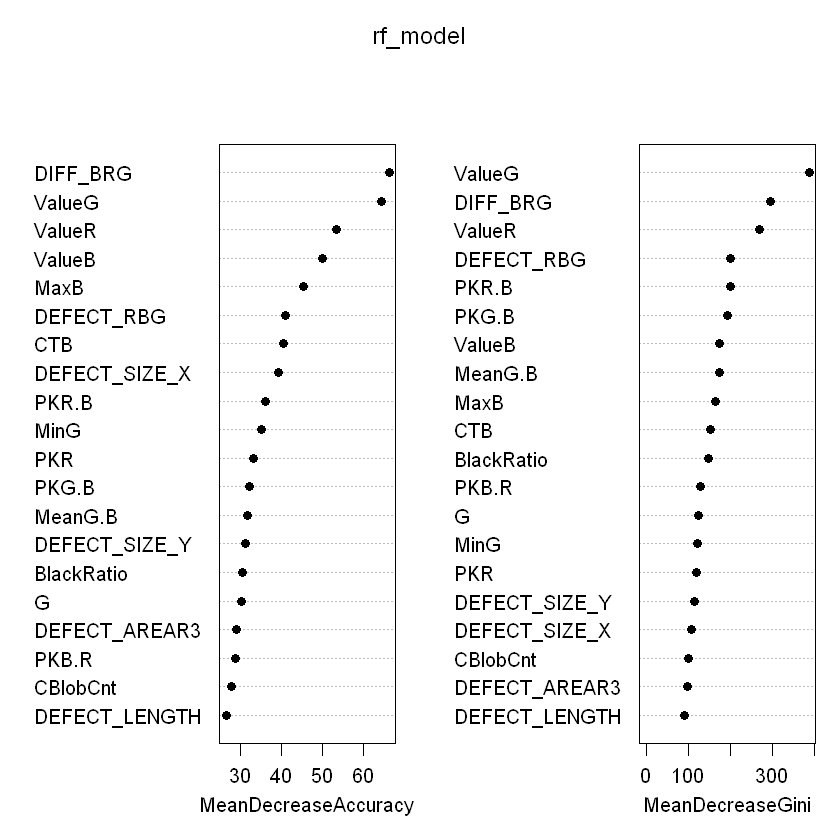

In [343]:
varImpPlot(rf_model,pch=16)

In [335]:
yhat.rf = rf_model$test$predicted
yhat.rf

1    2    4    7    8   13   19   21   25   29   32   37   39   45   46   50 
   G    G    G   NG   NG    G   NG    G   NG    G   NG    G    G    G   NG    G 
  53   54   55   60   70   71   82   83   85   88   89   90   92   93   97   98 
  NG    G    G   NG    G   NG    G   NG    G    G   NG    G   NG    G    G    G 
 100  101  104  105  108  112  114  115  125  127  128  130  134  135  139  142 
  NG    G    G    G   NG    G    G    G   NG   NG    G    G   NG    G   NG   NG 
 149  151  155  160  162  165  169  171  177  184  188  196  197  203  209  212 
   G   NG   NG    G   NG    G    G   NG   NG    G   NG   NG   NG   NG    G   NG 
 213  222  223  227  232  239  241  249  255  259  261  271  273  274  275  276 
   G   NG    G    G    G   NG   NG    G    G    G    G   NG   NG    G    G   NG 
 283  285  286  287  288  293  299  303  307  308  311  317  320  322  324  325 
   G   NG    G    G   NG   NG   NG   NG    G    G    G    G    G    G    G   NG 
 326  328  330  335  337  338  341  342  346  349  351  354  358  359  362  363 
  NG   NG    G   NG   NG    G    G    G   NG    G    G   NG   NG    G    G    G 
 364  375  376  380  382  384  386  388  390  391  401  402  406  408  409  411 
   G    G    G   NG   NG    G   NG    G    G   NG    G   NG    G    G    G    G 
 416  421  423  435  436  438  440  448  451  455  459  462  465  466  468  475 
   G    G   NG    G   NG   NG   NG    G    G    G    G    G   NG    G    G   NG 
 477  481  483  484  487  492  495  496  499  503  504  505  516  527  532  533 
   G    G   NG    G    G    G    G    G    G    G    G    G    G    G    G    G 
 536  537  538  545  547  552  554  556  558  559  562  565  569  571  573  579 
   G   NG   NG   NG    G    G   NG   NG    G    G    G    G   NG    G    G    G 
 581  589  593  595  596  597  605  607  615  617  619  622  635  636  638  641 
  NG   NG    G    G   NG   NG    G    G    G    G   NG    G   NG   NG    G    G 
 643  646  648  649  651  653  655  657  659  660  663  666  667  669  670  675 
   G    G    G   NG   NG   NG   NG   NG   NG   NG   NG   NG   NG    G    G    G 
 677  692  696  707  708  711  712  718  720  724  728  729  730  735  737  738 
  NG    G   NG    G   NG    G   NG    G    G   NG   NG   NG   NG    G    G   NG 
 739  741  742  743  744  745  747  748  749  757  759  764  765  766  768  779 
   G    G    G    G    G    G   NG   NG    G   NG   NG   NG    G    G    G   NG 
 781  784  795  803  804  809  818  821  823  825  826  828  830  831  832  833 
   G    G   NG   NG    G   NG   NG    G    G    G   NG    G   NG   NG    G   NG 
 836  843  847  851  858  864  867  874  877  888  889  892  897  904  905  912 
   G    G    G    G    G   NG   NG    G   NG    G    G    G    G    G    G    G 
 913  914  916  919  922  923  924  929  931  932  938  942  944  952  954  955 
   G    G    G    G   NG    G   NG   NG   NG    G   NG    G    G    G    G    G 
 956  958  963  964  969  972  973  974  977  978  980  982  985  986  987  988 
  NG    G    G    G    G    G    G    G   NG   NG   NG   NG    G    G    G    G 
 992  993 1000 1005 1019 1021 1024 1051 1052 1053 1055 1057 1058 1061 1063 1066 
   G    G    G    G   NG    G    G    G   NG   NG   NG    G   NG    G    G    G 
1070 1079 1080 1081 1091 1093 1095 1096 1098 1101 1109 1112 1115 1118 1119 1120 
   G    G    G    G    G    G    G    G    G    G    G    G    G    G   NG    G 
1121 1122 1127 1136 1137 1142 1151 1153 1155 1156 1158 1160 1162 1163 1164 1168 
   G   NG    G   NG    G   NG    G    G    G    G    G    G    G    G   NG   NG 
1173 1174 1181 1182 1189 1193 1201 1202 1203 1204 1210 1212 1213 1214 1223 1224 
  NG    G    G    G   NG   NG    G    G    G   NG    G    G    G    G   NG    G 
1228 1230 1236 1238 1240 1244 1246 1247 1249 1250 1252 1253 1257 1259 1261 1262 
   G    G   NG    G    G   NG   NG    G   NG   NG    G   NG    G   NG   NG   NG 
1267 1271 1273 1280 1281 1283 1291 1292 1295 1297 1313 1316 1342 1349 1350 1354 
   G    G    G    G    G    G    G

In [336]:
table(test$DEFECT_TYPE , yhat.rf)

    yhat.rf
        G   NG
  G  1660  114
  NG  282  944

In [340]:
mean(yhat.rf==test$DEFECT_TYPE) ### 정분류율

[1] 0.868

In [341]:
mean(yhat.rf!=test$DEFECT_TYPE) ### 오분류율

[1] 0.132

`(g)` 위에서 적합한 모형 중 가장 좋은 모형을 선택하시오.

- 정분류율과 오분류율을 평가지표로 보았을 때, 랜덤 포레스트 모델이 가장 좋은 모형이다.

-----

### `4`. ‘Wholesale customers data.csv’는 다양한 상품군에 대한 고객의 구매이력에 대한 자료이다. 다음에 대하여 다양한 방법으로 군집분석을 시행하여라. 군집분석 과정 및 결과에 대해 설명하여라.(아래 설명에 있는 6개의 변수만 사용하여 군집분석을 시행)

In [372]:
sale = read.csv("Wholesale_customers_data.csv")

<변수 설명>
1) FRESH: 신선한 제품에 대한 연간 지출
2) MILK:  유제품에 대한 연간 지출
3) GROCERY: 식료품에 대한 연간 지출
4) FROZEN: 냉동 제품에 대한 연간 지출
5) DETERGENTS PAPER: 세제 및 청소 제품에 대한 연간 지출
6) DELICATESSEN: 조제식품에 대한 연간 지출

In [376]:
sale = sale[, 3:8]

In [380]:
str(sale)

'data.frame':	440 obs. of  6 variables:
 $ Fresh           : int  12669 7057 6353 13265 22615 9413 12126 7579 5963 6006 ...
 $ Milk            : int  9656 9810 8808 1196 5410 8259 3199 4956 3648 11093 ...
 $ Grocery         : int  7561 9568 7684 4221 7198 5126 6975 9426 6192 18881 ...
 $ Frozen          : int  214 1762 2405 6404 3915 666 480 1669 425 1159 ...
 $ Detergents_Paper: int  2674 3293 3516 507 1777 1795 3140 3321 1716 7425 ...
 $ Delicassen      : int  1338 1776 7844 1788 5185 1451 545 2566 750 2098 ...


In [381]:
head(sale)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
,<int>,<int>,<int>,<int>,<int>,<int>
1,12669,9656,7561,214,2674,1338
2,7057,9810,9568,1762,3293,1776
3,6353,8808,7684,2405,3516,7844
4,13265,1196,4221,6404,507,1788
5,22615,5410,7198,3915,1777,5185
6,9413,8259,5126,666,1795,1451


- 440개의 관측치와 6개의 변수로 이루어진 데이터
- 각 변수가 모두 연속형 변수로 지출 비용을 의미한다. 

### 표준화

In [384]:
sale = scale(sale)

- 변수가 모두 지출 비용이라 단위가 똑같을 것 같지만 표준화를 실시했다.

### 1. 계층적 군집분석

In [391]:
D1 = dist(sale, method = "manhattan"  ) ## 맨하탄 거리를 사용

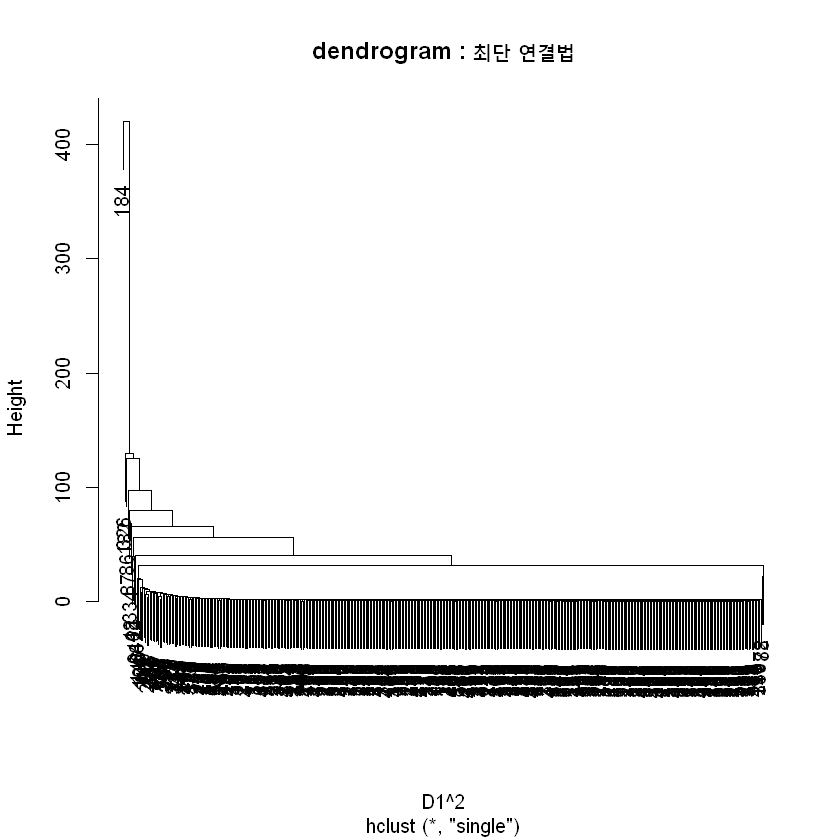

In [392]:
hc1 = hclust(D1^2 , method = "single") ## 계층적 군집분석 , 최단 연결법
plot(hc1 , hang = 0.1 , main = "dendrogram : 최단 연결법" )

In [420]:
hc1.result = cutree(hc1 , k=6) ## 최단 연결법 결과, 6개의 군집으로 분류
hc1.result ## 군집 결과

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 2 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 5 1
[186] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[223] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[260] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[297] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 6 1 1 1 1 1 1 1
[334] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[371] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[408] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [511]:
(1:nrow(sale))[hc1.result==1]  ## 1번 군집

[1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
 [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
 [55]  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 [73]  73  74  75  76  77  78  79  80  81  82  83  84  85  88  89  90  91  92
 [91]  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
[109] 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
[127] 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
[145] 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
[163] 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 183
[181] 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202
[199] 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220
[217] 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238
[235] 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256
[253] 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274
[271] 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292
[289] 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310
[307] 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 327 328 329
[325] 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347
[343] 348 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365
[361] 366 367 368 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383
[379] 384 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400 401
[397] 402 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419
[415] 420 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437
[433] 438 439 440

In [414]:
(1:nrow(sale))[hc1.result==2]  ## 2번 군집

[1] 86

In [415]:
(1:nrow(sale))[hc1.result==3]  ## 3번 군집

[1] 87

In [416]:
(1:nrow(sale))[hc1.result==4]  ## 4번 군집

[1] 182

In [417]:
(1:nrow(sale))[hc1.result==5]  ## 5번 군집

[1] 184

In [512]:
(1:nrow(sale))[hc1.result==6]  ## 6번 군집

[1] 326

- 관측치가 1번 군집에만 모여있고 나머지 군집에는 한 개의 관측치만 들어가 있음. 
- 군집화가 잘 안되는 거 같음

### 2. K-means

In [435]:
set.seed(1234)
kc1 = kmeans(sale , centers =6, nstart = 20) ## 중심점(군집 수) 6개 ,  k-means를 20번 시행해서 가장 작은 withness로 고름
attributes(kc1)

$names
[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

$class
[1] "kmeans"

In [436]:
kc1$cluster  ## 군집 분류 결과

[1] 6 4 4 6 5 6 6 6 6 4 4 6 5 4 4 6 4 6 5 6 6 6 5 4 5 6 6 6 4 5 5 6 6 5 6 6 5
 [38] 4 4 5 5 5 4 4 4 4 4 3 4 4 6 6 5 4 5 6 3 4 6 6 6 3 6 4 6 3 6 4 6 6 5 5 6 5
 [75] 6 5 6 4 6 6 6 4 4 6 6 3 3 5 6 5 6 6 3 1 4 6 6 6 6 6 4 4 6 1 6 6 4 4 6 4 6
[112] 4 5 6 6 6 6 6 5 6 6 6 6 6 5 1 5 5 6 5 6 6 6 6 6 6 6 6 6 6 6 5 5 6 6 4 6 6
[149] 6 5 6 6 6 6 6 4 4 6 6 4 4 6 6 4 6 4 4 6 6 6 4 4 6 4 6 4 5 6 6 6 6 1 4 2 6
[186] 6 6 6 4 4 5 6 6 4 6 5 5 4 6 6 4 4 5 6 6 4 6 6 6 4 6 3 6 6 4 4 4 6 4 6 6 4
[223] 6 6 6 6 5 6 6 6 6 6 5 6 6 6 6 5 6 5 5 5 6 6 4 4 6 6 6 6 6 3 6 5 4 5 6 6 5
[260] 5 6 6 5 6 4 4 4 5 4 6 6 6 6 5 6 6 5 5 6 6 6 6 5 5 5 5 6 5 6 5 6 6 6 4 5 6
[297] 6 6 6 6 6 4 4 4 4 4 4 6 6 4 6 5 4 6 6 4 6 6 6 4 6 6 6 6 5 1 6 6 5 6 6 4 5
[334] 3 5 5 6 6 6 6 4 4 6 4 6 6 4 5 6 4 6 4 6 4 5 6 5 4 6 6 6 6 6 6 6 6 6 6 5 6
[371] 5 5 6 6 6 6 4 5 6 6 5 5 5 6 4 6 6 6 6 6 6 6 6 5 6 6 4 6 6 6 6 5 5 5 6 6 5
[408] 4 6 6 6 6 6 5 6 6 4 6 4 6 4 6 5 6 6 5 4 5 6 6 6 5 6 6 6 5 5 4 6 6

In [437]:
kc1$centers ## 각 군집의 center 값

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
1,3.6134035,0.7451291,0.2123001,5.431028285,-0.2457485,0.89703352
2,1.9645810,5.1696185,1.2857533,6.892753825,-0.5542311,16.45971129
3,0.3134735,3.9174467,4.2707490,-0.003570131,4.6129149,0.50279301
4,-0.5038176,0.6963232,0.9201628,-0.332983798,0.9190419,0.09254661
5,1.2605908,-0.2143124,-0.2918719,0.497257055,-0.4148777,0.21071854
6,-0.3321021,-0.3883003,-0.4350927,-0.180818332,-0.3897820,-0.21289653


In [438]:
kc1$tot.withinss ## withinss를 모두 더한 것

[1] 920.3082

In [439]:
kc1$size  ## 각 군집에 들어있는 관측값의 수

[1]   5   1  10  94  84 246

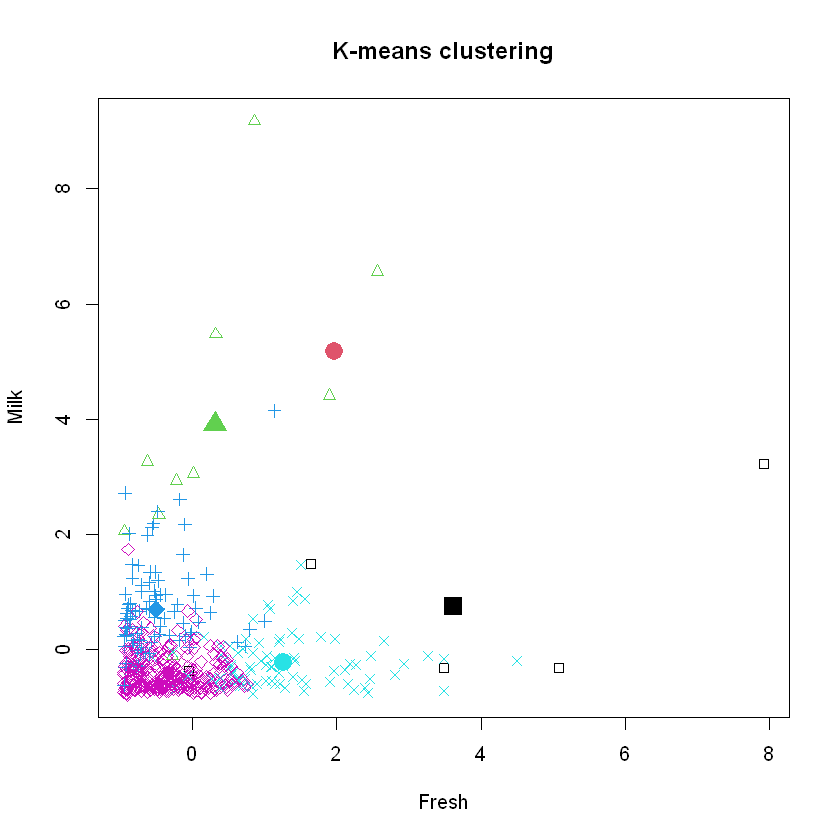

In [442]:
plot(sale, 
     pch = kc1$cluster-1, 
     col = kc1$cluster, 
     main = "K-means clustering")
points(kc1$centers, cex=2, col=c(1,2,3,4,5,6), pch=c(15,16,17,18,19,20)) ## 각 군집의 중심위치 

In [443]:
(1:nrow(sale))[kc1$cluster==1]  ## 1번 군집으로 분류된 관측치

[1]  94 104 126 182 326

In [444]:
(1:nrow(sale))[kc1$cluster==2]  ## 2번 군집으로 분류된 관측치

[1] 184

In [445]:
(1:nrow(sale))[kc1$cluster==3]  ## 3번 군집으로 분류된 관측치

[1]  48  57  62  66  86  87  93 212 252 334

In [446]:
(1:nrow(sale))[kc1$cluster==4]  ## 4번 군집으로 분류된 관측치

[1]   2   3  10  11  14  15  17  24  29  38  39  43  44  45  46  47  49  50  54
[20]  58  64  68  78  82  83  95 101 102 107 108 110 112 146 156 157 160 161 164
[39] 166 167 171 172 174 176 183 189 190 194 198 201 202 206 210 215 216 217 219
[58] 222 245 246 255 265 266 267 269 294 302 303 304 305 306 307 310 313 316 320
[77] 332 341 342 344 347 350 352 354 358 377 385 397 408 417 419 421 427 438

In [447]:
(1:nrow(sale))[kc1$cluster==5]  ## 5번 군집으로 분류된 관측치

[1]   5  13  19  23  25  30  31  34  37  40  41  42  53  55  71  72  74  76  88
[20]  90 113 119 125 127 128 130 142 143 150 177 191 196 197 203 227 233 238 240
[39] 241 242 254 256 259 260 263 268 274 277 278 283 284 285 286 288 290 295 312
[58] 325 329 333 335 336 348 355 357 369 371 372 378 381 382 383 394 402 403 404
[77] 407 414 423 426 428 432 436 437

In [448]:
(1:nrow(sale))[kc1$cluster==6]  ## 6번 군집으로 분류된 관측치

[1]   1   4   6   7   8   9  12  16  18  20  21  22  26  27  28  32  33  35
 [19]  36  51  52  56  59  60  61  63  65  67  69  70  73  75  77  79  80  81
 [37]  84  85  89  91  92  96  97  98  99 100 103 105 106 109 111 114 115 116
 [55] 117 118 120 121 122 123 124 129 131 132 133 134 135 136 137 138 139 140
 [73] 141 144 145 147 148 149 151 152 153 154 155 158 159 162 163 165 168 169
 [91] 170 173 175 178 179 180 181 185 186 187 188 192 193 195 199 200 204 205
[109] 207 208 209 211 213 214 218 220 221 223 224 225 226 228 229 230 231 232
[127] 234 235 236 237 239 243 244 247 248 249 250 251 253 257 258 261 262 264
[145] 270 271 272 273 275 276 279 280 281 282 287 289 291 292 293 296 297 298
[163] 299 300 301 308 309 311 314 315 317 318 319 321 322 323 324 327 328 330
[181] 331 337 338 339 340 343 345 346 349 351 353 356 359 360 361 362 363 364
[199] 365 366 367 368 370 373 374 375 376 379 380 384 386 387 388 389 390 391
[217] 392 393 395 396 398 399 400 401 405 406 409 410 411 412 413 415 416 418
[235] 420 422 424 425 429 430 431 433 434 435 439 440

clusters,y
<fct>,<dbl>
1,0.0000000
2,0.5673045
3,0.5323211
4,0.3623237
5,0.3680719
6,0.3701213
7,0.3062296
8,0.2507138
9,0.3039773


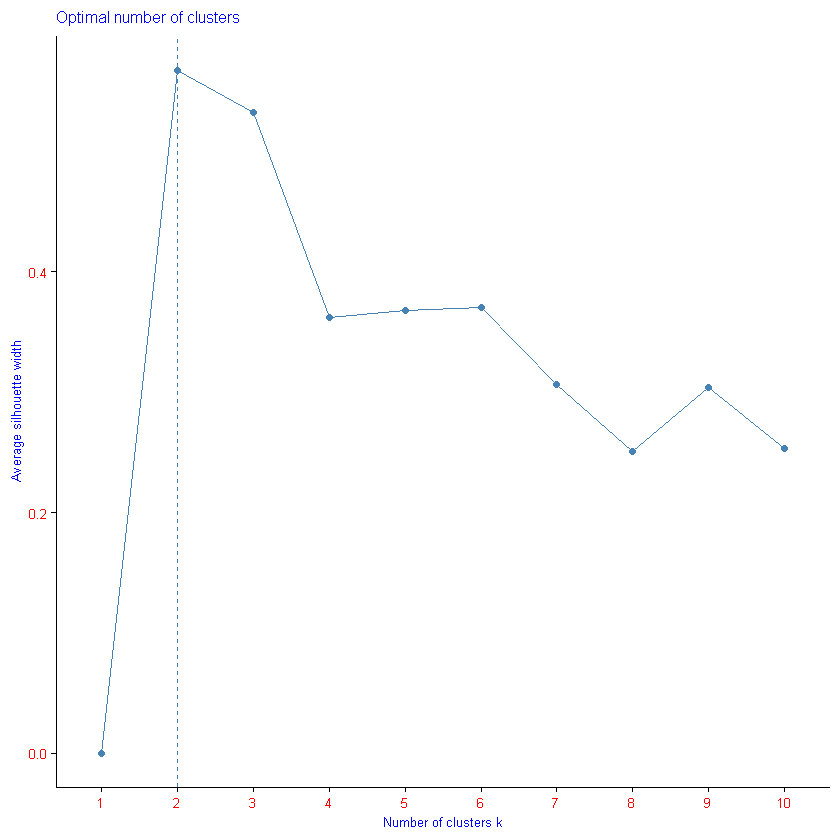

In [513]:
sil = fviz_nbclust(sale, kmeans, method = "silhouette")
p2 <- sil+theme(axis.text = element_text(size = 8, color = "red"), 
                title = element_text(size = 8, color = "blue"))
sil$data
p2

In [526]:
set.seed(1234)
kc2 = kmeans(sale , centers =2, nstart = 20) ## 중심점(군집 수) 2개 ,  k-means를 20번 시행해서 가장 작은 withness로 고름
attributes(kc2)

$names
[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

$class
[1] "kmeans"

In [527]:
kc2$tot.withinss

[1] 1949.601

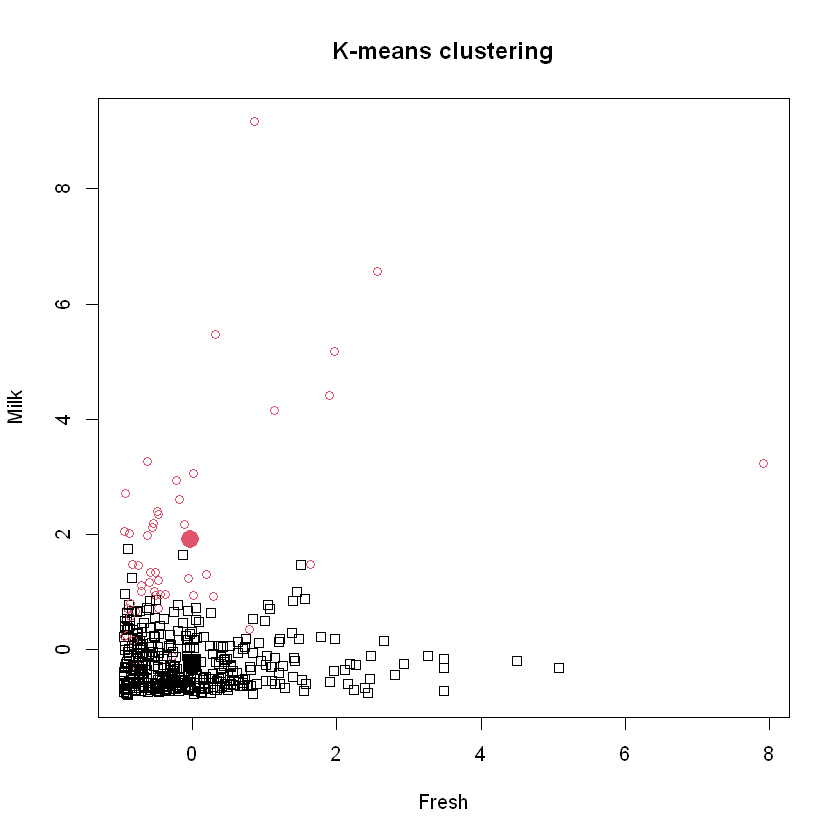

In [528]:
plot(sale, 
     pch = kc2$cluster-1, 
     col = kc2$cluster, 
     main = "K-means clustering")
points(kc1$centers, cex=2, col=c(1,2), pch=c(15,16)) ## 각 군집의 중심위치 

### 3. K-medoids

In [450]:
library(cluster) ## pam
library(factoextra) ## fviz_cluster (pam을 시각화 )

In [529]:
kmc1 = pam(sale , k=6) ## 표준화한 데이터, 사전 군집수 6 
summary(kmc1)

Medoids:
      ID        Fresh        Milk     Grocery     Frozen Detergents_Paper
[1,] 416 -0.328788614  0.03383758  0.06321293 -0.2844541        0.1381139
[2,]  92  0.059593791 -0.41112613 -0.57047084  1.1578674       -0.4728528
[3,] 242  1.022247655 -0.54133628 -0.57625839 -0.1763109       -0.5179464
[4,] 375 -0.447707005 -0.47968631 -0.66117748 -0.3254455       -0.5391300
[5,]  10 -0.473957607  0.71767797  1.15011422 -0.3940392        0.9529458
[6,] 212  0.009385561  3.05265348  3.34022717  0.3427766        3.4666551
     Delicassen
[1,]  0.1238002
[2,] -0.1446295
[3,] -0.1694512
[4,] -0.2974606
[5,]  0.2032298
[6,]  0.4769784
Clustering vector:
  [1] 1 1 1 2 3 1 1 1 4 5 1 4 3 1 1 4 1 1 1 1 3 4 2 6 1 1 4 4 5 3 1 4 3 3 4 1 3
 [38] 5 5 3 2 3 5 5 1 5 5 6 1 6 4 4 3 1 3 4 6 5 4 1 1 6 1 5 4 6 4 1 1 4 2 5 2 2
 [75] 1 3 2 5 4 4 4 5 1 3 1 6 6 3 2 3 4 2 6 2 1 4 1 4 4 2 5 5 1 2 4 3 1 5 1 5 4
[112] 5 2 4 3 4 4 4 3 4 3 4 4 1 3 3 2 1 4 3 2 4 4 4 4 4 1 1 1 4 3 3 3 2 3 5 4 4
[149] 4 3 3 4 3 4 4 5 

In [530]:
kmc1$id.med ## 중앙자로 쓰인 관측치 번호

[1] 416  92 242 375  10 212

In [458]:
kmc1$clustering   ## 군집 결과

[1] 1 1 1 2 3 1 1 1 4 5 1 4 3 1 1 4 1 1 1 1 3 4 2 6 1 1 4 4 5 3 1 4 3 3 4 1 3
 [38] 5 5 3 2 3 5 5 1 5 5 6 1 6 4 4 3 1 3 4 6 5 4 1 1 6 1 5 4 6 4 1 1 4 2 5 2 2
 [75] 1 3 2 5 4 4 4 5 1 3 1 6 6 3 2 3 4 2 6 2 1 4 1 4 4 2 5 5 1 2 4 3 1 5 1 5 4
[112] 5 2 4 3 4 4 4 3 4 3 4 4 1 3 3 2 1 4 3 2 4 4 4 4 4 1 1 1 4 3 3 3 2 3 5 4 4
[149] 4 3 3 4 3 4 4 5 5 3 1 5 1 4 4 5 1 5 1 4 4 4 5 5 1 5 4 1 3 1 4 4 1 3 1 6 4
[186] 4 4 1 1 1 2 4 4 5 4 2 2 1 4 4 5 5 1 4 4 5 4 1 1 5 3 6 4 1 1 5 5 3 5 4 4 1
[223] 2 4 4 4 1 4 4 2 2 1 3 4 3 4 4 3 4 3 2 3 3 1 1 5 4 4 4 2 4 6 2 3 1 3 4 4 3
[260] 3 4 2 3 4 5 5 5 3 5 4 4 4 1 3 4 4 3 2 2 1 4 1 3 2 3 3 4 2 3 3 4 4 4 5 3 4
[297] 3 1 1 4 1 5 1 5 5 1 5 3 4 5 2 3 5 4 4 5 4 4 4 5 4 4 3 1 3 2 4 4 2 4 4 5 3
[334] 6 2 3 4 2 2 2 1 1 1 5 4 1 5 3 4 5 4 5 4 5 2 4 3 5 1 4 3 4 4 4 4 1 4 4 3 4
[371] 3 2 4 1 4 4 1 3 4 1 3 2 3 4 5 4 4 3 4 4 4 4 4 2 4 4 1 2 2 4 4 2 3 3 3 4 2
[408] 5 1 1 4 4 1 2 2 1 5 1 5 4 1 1 3 3 1 2 1 2 4 4 1 2 3 4 1 2 3 5 4 4

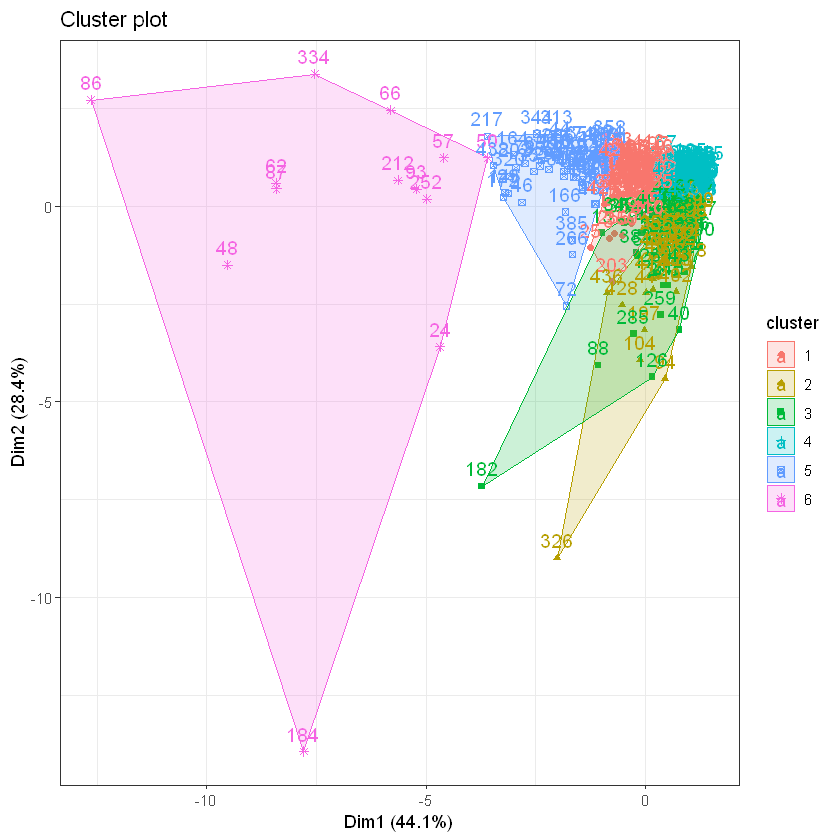

In [459]:
fviz_cluster(kmc1,sale) + theme_bw() ## 배경을 흰색으로 바꿔줌

clusters,y
<fct>,<dbl>
1,0.0000000
2,0.4084763
3,0.2403235
4,0.1716342
5,0.1936436
6,0.2227845
7,0.2148803
8,0.2345548
9,0.2294409


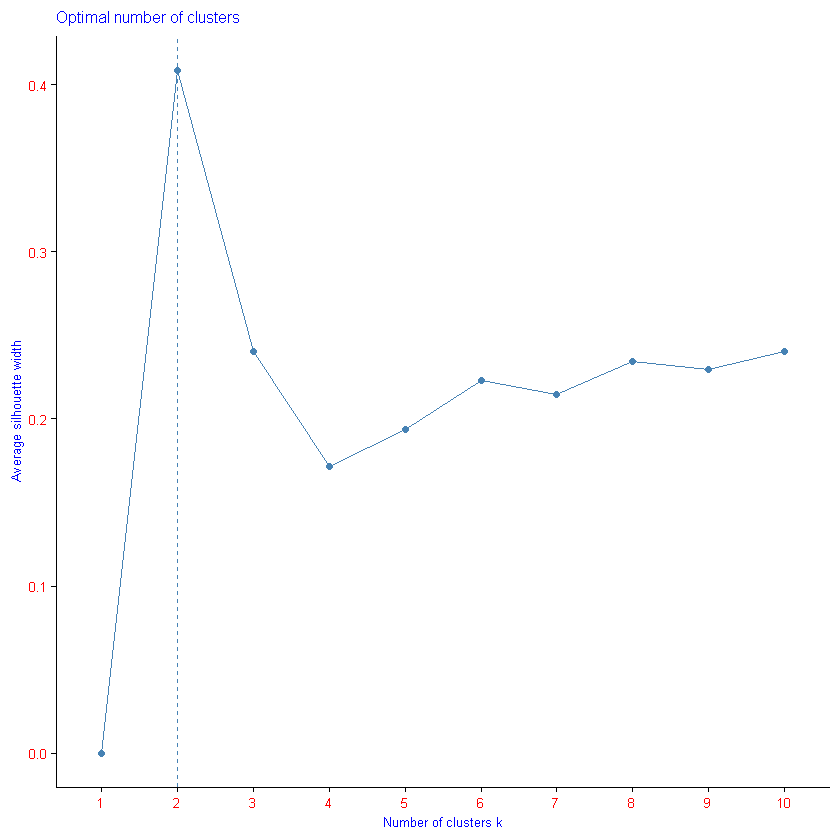

In [523]:
sil = fviz_nbclust(sale, pam, method = "silhouette")
p2 <- sil+theme(axis.text = element_text(size = 8, color = "red"), 
                title = element_text(size = 8, color = "blue"))
sil$data
p2

- 최적의 k는 실루엣 계수가 가장 큰 2가 적당해 보인다. 

In [463]:
kmc2 = pam(sale , k=2) ## 표준화한 데이터, 사전 군집수 6

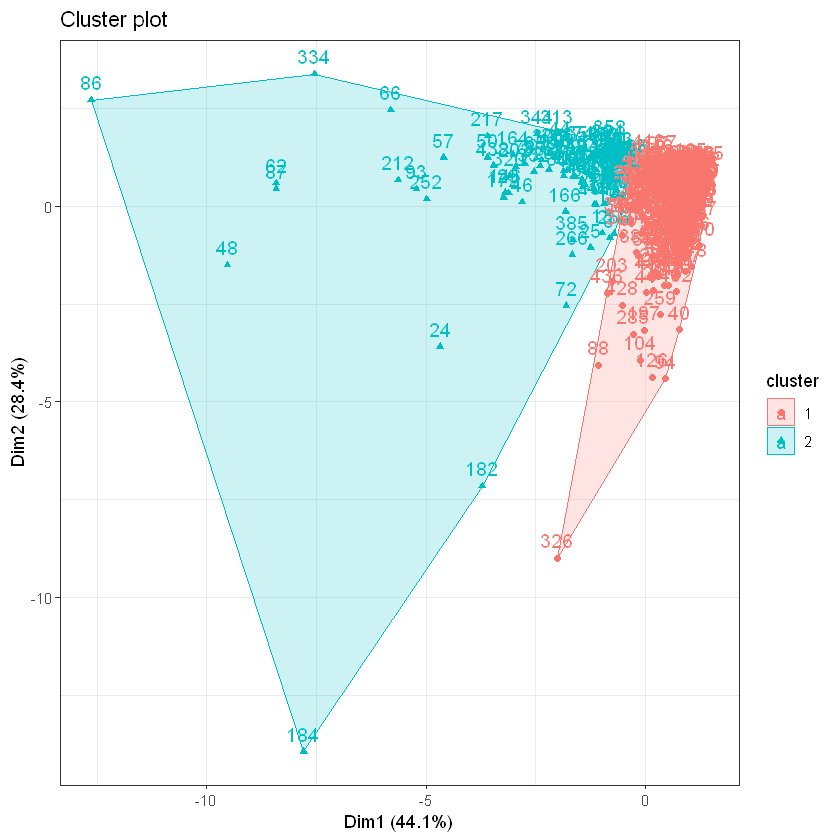

In [464]:
fviz_cluster(kmc2,sale) + theme_bw()

- 군집 수를 6으로 정했을 때보다 훨씬 군집이 잘 구분되었다.

### 4. SOM

In [465]:
library(kohonen) ## som

In [469]:
sc1 = som(sale, grid = somgrid(3,2,topo = "hexagonal"))  ### 경쟁층의 격자 3x2

In [471]:
sc1$unit.classif  ## 군집분류 결과, 총 6개의 군집으로 분류

[1] 6 5 5 6 3 6 6 6 6 5 5 6 3 5 3 6 5 6 3 6 6 6 3 4 3 6 6 6 5 3 3 6 3 3 6 5 3
 [38] 5 5 3 3 3 5 5 5 5 5 1 5 5 6 6 3 5 3 6 1 5 6 6 6 1 6 5 6 1 6 5 6 6 3 3 6 3
 [75] 6 3 6 5 6 6 6 5 5 3 6 1 1 3 6 3 6 6 1 2 5 6 6 6 6 6 5 5 6 2 6 6 5 5 6 5 6
[112] 5 3 6 6 6 6 6 3 6 6 6 6 6 3 2 3 3 6 3 6 6 6 6 6 6 6 6 6 6 3 3 3 6 6 5 6 6
[149] 6 3 6 6 6 6 6 5 5 6 5 5 5 6 6 5 6 5 5 6 6 6 5 5 6 5 6 5 3 6 6 6 6 4 5 4 6
[186] 6 6 6 5 5 6 6 6 5 6 3 2 5 6 6 5 5 3 6 6 5 6 6 6 5 3 1 6 6 5 5 5 6 5 6 6 5
[223] 6 6 6 6 3 6 6 6 6 6 3 6 6 6 6 3 6 3 3 3 6 6 5 5 6 6 6 6 6 1 6 3 5 3 6 6 3
[260] 3 6 6 3 6 5 5 5 3 5 6 6 6 6 3 6 6 3 2 6 6 6 6 3 3 3 3 6 6 6 3 6 6 6 5 3 6
[297] 3 6 6 6 6 5 5 5 5 5 5 6 6 5 6 3 5 6 6 5 6 6 6 5 6 6 6 6 3 2 6 6 3 6 6 5 3
[334] 1 3 3 6 6 2 6 5 5 6 5 6 6 5 3 6 5 6 5 6 5 6 6 3 5 6 6 3 6 6 6 6 6 6 6 3 6
[371] 3 3 6 6 6 6 5 3 6 6 3 3 3 6 5 6 6 3 6 6 6 6 6 3 6 6 5 6 6 6 6 2 3 3 3 6 3
[408] 5 6 6 6 6 6 2 6 6 5 6 5 6 5 6 3 6 6 2 5 2 6 6 6 2 3 6 6 2 3 5 6 6

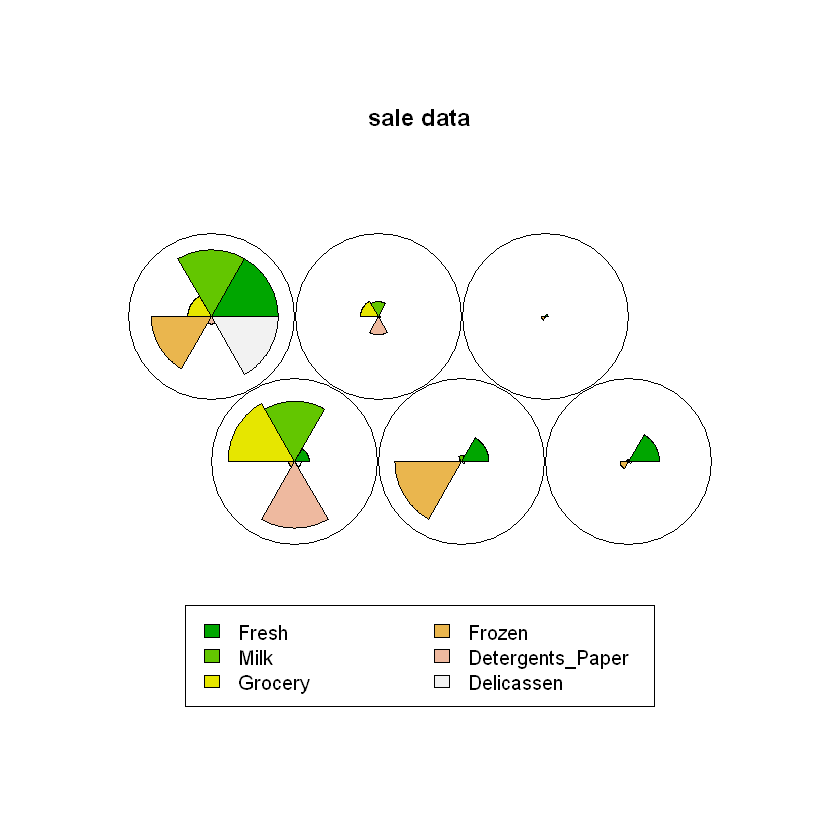

In [475]:
plot(sc1, main="sale data") ## 기본 옵션 그림

- 6번째 군집에는 Fresh값이 큰 쪽이 주로 있다. 

In [483]:
sc2 = som(sale, grid = somgrid(2,2,topo = "hexagonal"))  ### 경쟁층의 격자 2x2

In [481]:
sc2$unit.classif  ## 군집분류 결과, 총 2개의 군집으로 분류

[1] 2 2 2 2 3 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 3 1 3 2 2 2 1 3 2 2 2 3 2 2 3
 [38] 2 2 3 3 2 2 1 2 1 1 1 2 1 2 2 3 2 3 2 1 2 2 2 2 1 2 2 2 1 2 2 2 2 3 3 2 3
 [75] 2 3 2 1 2 2 2 2 2 3 2 1 1 3 2 3 2 3 1 3 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2
[112] 2 3 2 2 2 2 2 3 2 2 2 2 2 3 3 3 2 2 3 2 2 2 2 2 2 2 2 2 2 2 3 3 2 2 1 2 2
[149] 2 3 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 3 2 2 2 2 3 2 4 2
[186] 2 2 2 2 2 3 2 2 2 2 3 3 2 2 2 1 1 3 2 2 1 2 2 2 1 2 1 2 2 2 2 1 2 2 2 2 2
[223] 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 3 2 3 3 3 2 2 2 2 2 2 2 2 2 1 2 3 2 3 2 2 3
[260] 3 2 2 3 2 2 2 2 3 2 2 2 2 2 3 2 2 3 3 2 2 2 2 3 3 3 3 2 3 2 3 2 2 2 2 2 2
[297] 2 2 2 2 2 1 2 2 1 2 1 2 2 2 2 3 1 2 2 2 2 2 2 1 2 2 2 2 3 4 2 2 3 2 2 1 3
[334] 1 3 3 2 2 2 2 2 2 2 1 2 2 2 3 2 1 2 1 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 3 2
[371] 3 3 2 2 2 2 2 3 2 2 3 3 3 2 2 2 2 3 2 2 2 2 2 3 2 2 2 2 2 2 2 3 3 3 2 2 3
[408] 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 3 2 2 3 2 3 2 2 2 3 2 2 2 3 3 1 2 2

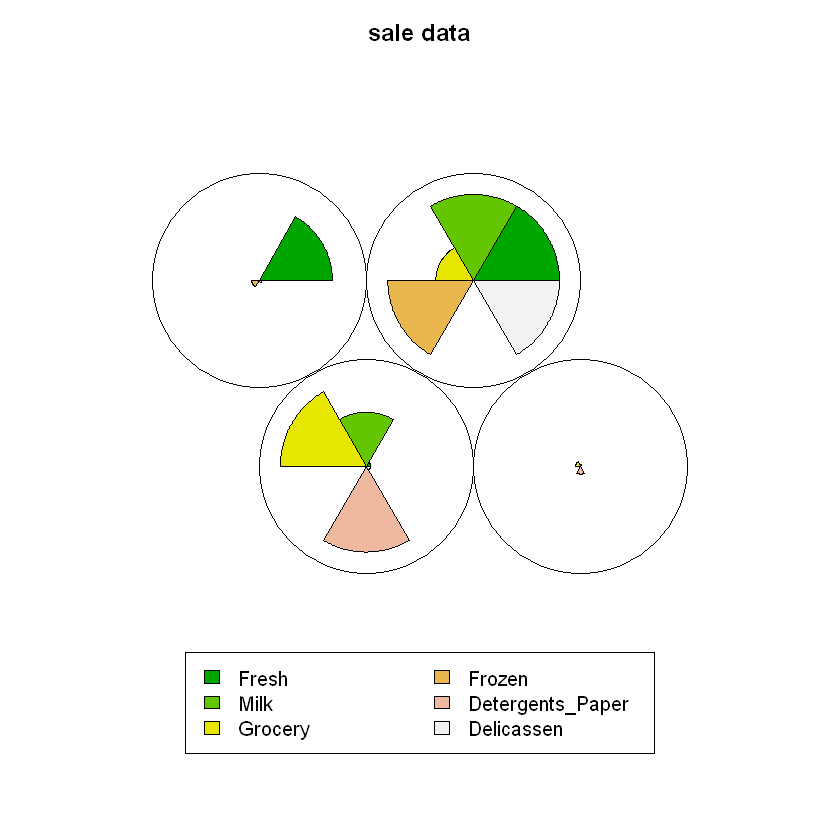

In [482]:
plot(sc2, main="sale data") ## 기본 옵션 그림

### 5. DBscan

In [536]:
library(dbscan) ## dbscan, knndist

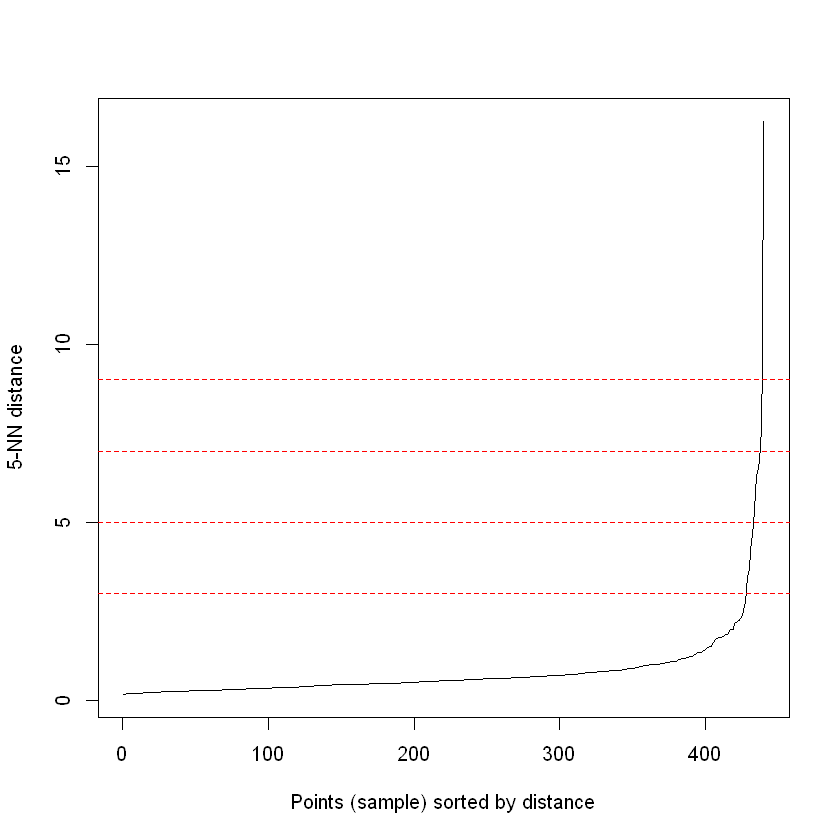

In [539]:
kNNdistplot(sale,k=5) ## 5개의 가장 가까운 이웃의 거리
abline(h = seq(3,10 , 2) , col ="red" , lty=2)

- y=3 아래 있는 데이터가 모두 중심이 될 수 있다.
- epsilon(기준 점으로부터 거리) = 3으로 설정

In [540]:
m <- 3
res1 <- dbscan(sale, eps = 3 , minPts = m)
res1

DBSCAN clustering for 440 objects.
Parameters: eps = 3, minPts = 3
The clustering contains 1 cluster(s) and 12 noise points.

  0   1 
 12 428 

Available fields: cluster, eps, minPts

- 한점을 기준으로 반경 3 내에 점이 최소 3개 이상 있으면 하나의 군집으로 인식
- 12개의 noise point가 생기고 나머지는 모두 하나의 군집으로 분류된다.  --> 군집분류가 잘 안됨

In [546]:
m <- 2
res1 <- dbscan(sale, eps = 3 , minPts = m)
res1

DBSCAN clustering for 440 objects.
Parameters: eps = 3, minPts = 2
The clustering contains 3 cluster(s) and 8 noise points.

  0   1   2   3 
  8 428   2   2 

Available fields: cluster, eps, minPts

- 한점을 기준으로 반경 3 내에 점이 최소 2개 이상 있으면 하나의 군집으로 인식
- 8개의 noise point가 생기고 나머지는 3개의 군집으로 분류된다. 
- 하지만 1번 군집에 많은 데이터가 몰려있어 그다지 성능이 좋지 않은 군집분석으로 판단된다.